In [123]:
import nltk

In [124]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# 판다스 프로파일링

In [125]:
import pandas as pd
import pandas_profiling
data = pd.read_csv('./archive/spam.csv',encoding='latin1')
# 윈도우 바탕화면에서 작업한 저자의 경우에는
# data = pd.read_csv(r'C:\Users\USER\Desktop\spam.csv',encoding='latin1')

In [126]:
data[:5]
# v1열은 해당 메일이 스팸인지 아닌지를 나타내는 레이블에 해당되는 열입니다.
# ham은 정상 메일을 의미하고, spam은 스팸 메일을 의미합니다. 
# v2열은 메일의 본문을 담고있습니다.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [127]:
pr=data.profile_report() # 프로파일링 결과 리포트를 pr에 저장
# data.profile_report() # 바로 결과 보기
pr

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [128]:
pr.to_file('./pr_report.html') # pr_report.html 파일로 저장

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [129]:
pr # pr에 저장했던 리포트 출력
# Overview는 데이터의 전체적인 개요를 보여줍니다.
# 데이터의 크기, 변수의 수, 결측값(missing value) 비율, 데이터의 종류는 어떤 것이 있는지를 볼 수 있습니다.

* Dataset info를 보겠습니다. 해당 데이터는 총 5,572개의 샘플(행)을 가지고 있으며, 5개의 열을 가지고 있습니다. 하나의 값을 셀이라고 하였을 때, 총 5,572 × 5개의 셀이 존재하지만 그 중 16,648개(59.8%)가 결측값(missing values)으로 확인됩니다.


# 텍스트 전처리

### 토큰화

In [130]:
# word_tokenize와 WordPunctTokenizer를 사용해서 아포스트로피를 어떻게 처리하는지 확인
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [131]:
print('단어 토큰화1 :',word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
# word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리

단어 토큰화1 : ['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [132]:
print('단어 토큰화2 :',WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
# WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리

단어 토큰화2 : ['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


In [133]:
print('단어 토큰화3 :',text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))
# 케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존

단어 토큰화3 : ["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


In [134]:
# 토큰화 방법 중 하나인 Penn Treebank Tokenization의 규칙에 대해서 소개하고, 토큰화의 결과를 확인
from nltk.tokenize import TreebankWordTokenizer

tokenizer = TreebankWordTokenizer()

text = "Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print('트리뱅크 워드토크나이저 :',tokenizer.tokenize(text))
# home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리되었음

트리뱅크 워드토크나이저 : ['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


* 규칙 1. 하이푼으로 구성된 단어는 하나로 유지한다.
* 규칙 2. doesn't와 같이 아포스트로피로 '접어'가 함께하는 단어는 분리해준다.

In [135]:
# 영어 문장의 토큰화를 수행하는 sent_tokenize를 지원
from nltk.tokenize import sent_tokenize

text = "His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print('문장 토큰화1 :',sent_tokenize(text))
# 위 코드는 text에 저장된 여러 개의 문장들로부터 문장을 구분하는 코드

문장 토큰화1 : ['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


In [136]:
# 문장 중간에 마침표가 다수 등장하는 경우에 대해서도 실습
text = "I am actively looking for Ph.D. students. and you are a Ph.D student."
print('문장 토큰화2 :',sent_tokenize(text))
# NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않았기 때문에, Ph.D.를 문장 내의 단어로 인식하여 성공적으로 인식하는 것을 볼 수 있습니다.

문장 토큰화2 : ['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


In [137]:
# 한국어의 경우에는 박상길님이 개발한 KSS(Korean Sentence Splitter)를 추천
import kss

text = '딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다. 이제 해보면 알걸요?'
print('한국어 문장 토큰화 :',kss.split_sentences(text))

[Korean Sentence Splitter]: Initializing Pynori...


한국어 문장 토큰화 : ['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어렵습니다.', '이제 해보면 알걸요?']


### NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습

In [138]:
# Penn Treebank POS Tags라는 기준을 사용하여 품사를 태깅
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

text = "I am actively looking for Ph.D. students. and you are a Ph.D. student."
tokenized_sentence = word_tokenize(text)

print('단어 토큰화 :',tokenized_sentence)
print('품사 태깅 :',pos_tag(tokenized_sentence))
#PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사

단어 토큰화 : ['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']
품사 태깅 : [('I', 'PRP'), ('am', 'VBP'), ('actively', 'RB'), ('looking', 'VBG'), ('for', 'IN'), ('Ph.D.', 'NNP'), ('students', 'NNS'), ('.', '.'), ('and', 'CC'), ('you', 'PRP'), ('are', 'VBP'), ('a', 'DT'), ('Ph.D.', 'NNP'), ('student', 'NN'), ('.', '.')]


In [139]:
# 한국어 자연어 처리를 위해서는 KoNLPy(코엔엘파이)라는 파이썬 패키지를 사용
# 형태소 토큰화(morpheme tokenization)를 수행해보겠습니다. 
#여기서는 Okt 형태소 분석기를 사용하여 토큰화를 수행
from konlpy.tag import Okt
from konlpy.tag import Kkma

okt = Okt()
kkma = Kkma()

print('OKT 형태소 분석 :',okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 품사 태깅 :',okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('OKT 명사 추출 :',okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요")) 

OKT 형태소 분석 : ['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']
OKT 품사 태깅 : [('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]
OKT 명사 추출 : ['코딩', '당신', '연휴', '여행']


* morphs : 형태소 추출
* pos : 품사 태깅(Part-of-speech tagging)
* nouns : 명사 추출

In [140]:
# 꼬꼬마 형태소 분석기를 사용하여 토큰화를 수행
print('꼬꼬마 형태소 분석 :',kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 품사 태깅 :',kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))
print('꼬꼬마 명사 추출 :',kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

꼬꼬마 형태소 분석 : ['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']
꼬꼬마 품사 태깅 : [('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]
꼬꼬마 명사 추출 : ['코딩', '당신', '연휴', '여행']


### 정제(Cleaning) and 정규화(Normalization)

In [141]:
import re
text = "I was wondering if anyone out there could enlighten me on this car."

# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


### 어간 추출(Stemming) and 표제어 추출(Lemmatization)

In [142]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])


표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


In [143]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


In [144]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


In [145]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


### 불용어(Stopword)

In [146]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from konlpy.tag import Okt

In [147]:
stop_words_list = stopwords.words('english')
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 179
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [148]:
example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for word in word_tokens: 
    if word not in stop_words: 
        result.append(word) 

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
불용어 제거 후 : ['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


In [149]:
okt = Okt()

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "를 아무렇게나 구 우려 고 안 돼 같은 게 구울 때 는"

stop_words = set(stop_words.split(' '))
word_tokens = okt.morphs(example)

result = [word for word in word_tokens if not word in stop_words]

print('불용어 제거 전 :',word_tokens) 
print('불용어 제거 후 :',result)

불용어 제거 전 : ['고기', '를', '아무렇게나', '구', '우려', '고', '하면', '안', '돼', '.', '고기', '라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살', '을', '구울', '때', '는', '중요한', '게', '있지', '.']
불용어 제거 후 : ['고기', '하면', '.', '고기', '라고', '다', '아니거든', '.', '예컨대', '삼겹살', '을', '중요한', '있지', '.']


### 정규표현식

In [150]:
import re

In [151]:
r = re.compile("a.c") #.:한 개의 임의의 문자를 나타낸다
r.search("kkk") # 아무런 결과도 출력되지 않는다.

In [152]:
r.search("abc").group(0)

'abc'

In [153]:
r = re.compile("ab?c") # ?: 앞의 문자가 0또는 1개 
r.search("abbc") 
# 아무런 결과도 출력되지 않는다.b가 두개 있어서 출력x

In [154]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [155]:
r = re.compile("ab*c")
r.search("a") # 아무런 결과도 출력되지 않는다.

In [156]:
r.search("ac")

<re.Match object; span=(0, 2), match='ac'>

In [157]:
r.search("abc")

<re.Match object; span=(0, 3), match='abc'>

In [158]:
r.search("abbbbc")

<re.Match object; span=(0, 6), match='abbbbc'>

In [159]:
r = re.compile("ab+c") #+: 앞의 문자가 최소 한번 이상
r.search("ac") # 아무런 결과도 출력되지 않는다.

In [160]:
r.search("abc") 

<re.Match object; span=(0, 3), match='abc'>

In [161]:
r.search("abbbbbc") 

<re.Match object; span=(0, 7), match='abbbbbc'>

In [162]:
# ^는 시작되는 문자열을 지정
r = re.compile("^ab")

# 아무런 결과도 출력되지 않는다.
r.search("bbc")
r.search("zab")

In [163]:
r.search("abz")

<re.Match object; span=(0, 2), match='ab'>

In [164]:
r = re.compile("ab{2}c")

# 아무런 결과도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbc")

In [165]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [166]:
r = re.compile("ab{2,8}c")
#  a와 c 사이에 b가 존재하면서 b는 2개 이상 8개 이하인 문자열에 대해서 매치

# 아무런 결과도 출력되지 않는다.
r.search("ac")
r.search("abc")
r.search("abbbbbbbbbc")

In [167]:
r.search("abbc")

<re.Match object; span=(0, 4), match='abbc'>

In [168]:
r.search("abbbbbbbbc")


<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [169]:
r = re.compile("a{2,}bc")

# 아무런 결과도 출력되지 않는다.
r.search("bc")
r.search("aa")

In [170]:
r.search("aabc")

<re.Match object; span=(0, 4), match='aabc'>

In [171]:
r.search("aaaaaaaabc")

<re.Match object; span=(0, 10), match='aaaaaaaabc'>

In [172]:
r = re.compile("[abc]") # [abc]는 [a-c]와 같다.
r.search("zzz") # 아무런 결과도 출력되지 않는다.

In [173]:
r.search("a")

<re.Match object; span=(0, 1), match='a'>

In [174]:
r.search("baac")      

<re.Match object; span=(0, 1), match='b'>

In [175]:
r = re.compile("[a-z]")

# 아무런 결과도 출력되지 않는다.
r.search("AAA")
r.search("111") 

In [176]:
r.search("aBC")

<re.Match object; span=(0, 1), match='a'>

In [177]:
# [^문자]는 ^기호 뒤에 붙은 문자들을 제외한 모든 문자를 매치
# [^abc]라는 정규 표현식이 있다면, a 또는 b 또는 c가 들어간 문자열을 제외한 모든 문자열을 매치
r = re.compile("[^abc]")

# 아무런 결과도 출력되지 않는다.
r.search("a")
r.search("ab") 
r.search("b")

In [178]:
r.search("d")

<re.Match object; span=(0, 1), match='d'>

In [179]:
r.search("1")      

<re.Match object; span=(0, 1), match='1'>

In [180]:
# search()가 정규 표현식 전체에 대해서 문자열이 매치하는지를 본다면, match()는 문자열의 첫 부분부터 정규 표현식과 매치하는지를 확인
r = re.compile("ab.")
r.match("kkkabc") # 아무런 결과도 출력되지 않는다.
#문자열 중간에 찾을 패턴이 있더라도 match 함수는 문자열의 시작에서 패턴이 일치하지 않으면 찾지 않습니다.

In [181]:
r.search("kkkabc")  

<re.Match object; span=(3, 6), match='abc'>

In [182]:
r.match("abckkk") 

<re.Match object; span=(0, 3), match='abc'>

In [183]:
# 공백 기준 분리
text = "사과 딸기 수박 메론 바나나"
re.split(" ", text)

['사과', '딸기', '수박', '메론', '바나나']

In [184]:
# 줄바꿈 기준 분리
text = """사과
딸기
수박
메론
바나나"""

re.split("\n", text)

['사과', '딸기', '수박', '메론', '바나나']

In [185]:
# '+'를 기준으로 분리
text = "사과+딸기+수박+메론+바나나"

re.split("\+", text)

['사과', '딸기', '수박', '메론', '바나나']

In [186]:
text = """이름 : 김철수
전화번호 : 010 - 1234 - 1234
나이 : 30
성별 : 남"""

re.findall("\d+", text)

['010', '1234', '1234', '30']

In [187]:
re.findall("\d+", "문자열입니다.")

[]

In [188]:
text = "Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

preprocessed_text = re.sub('[^a-zA-Z]', ' ', text)
print(preprocessed_text)

Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern 


In [189]:
text = """100 John    PROF
101 James   STUD
102 Mac   STUD"""

In [190]:
re.split('\s+', text)  #\s: 공백

['100', 'John', 'PROF', '101', 'James', 'STUD', '102', 'Mac', 'STUD']

In [191]:
re.findall('\d+',text)  

['100', '101', '102']

In [192]:
re.findall('[A-Z]',text)

['J', 'P', 'R', 'O', 'F', 'J', 'S', 'T', 'U', 'D', 'M', 'S', 'T', 'U', 'D']

In [193]:
re.findall('[A-Z]{4}',text)

['PROF', 'STUD', 'STUD']

In [194]:
re.findall('[A-Z][a-z]+',text)

['John', 'James', 'Mac']

In [195]:
from nltk.tokenize import RegexpTokenizer

text = "Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop"

tokenizer1 = RegexpTokenizer("[\w]+")
tokenizer2 = RegexpTokenizer("\s+", gaps=True)

print(tokenizer1.tokenize(text))
print(tokenizer2.tokenize(text))

['Don', 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'Mr', 'Jone', 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']
["Don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name,', 'Mr.', "Jone's", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


### 정수 인코딩(Integer Encoding)

#### 케라스(Keras)의 텍스트 전처리

케라스(Keras)는 기본적인 전처리를 위한 도구들을 제공합니다. 때로는 정수 인코딩을 위해서 케라스의 전처리 도구인 토크나이저를 사용하기도 합니다.

In [196]:
# enumerate 사용하여 각 단어에 인덱스 부여하기
# enumerate()는 순서가 있는 자료형(list, set, tuple, dictionary, string)을 입력으로 받아 인덱스를 순차적으로 함께 리턴한다는 특징이 있습니다. 
test_input = ['a', 'b', 'c', 'd', 'e']
for index, value in enumerate(test_input): # 입력의 순서대로 0부터 인덱스를 부여함.
  print("value : {}, index: {}".format(value, index))

value : a, index: 0
value : b, index: 1
value : c, index: 2
value : d, index: 3
value : e, index: 4


In [197]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [198]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [199]:
tokenizer = Tokenizer()

# fit_on_texts()안에 코퍼스를 입력으로 하면 빈도수를 기준으로 단어 집합을 생성.
tokenizer.fit_on_texts(preprocessed_sentences) 

In [200]:
tokenizer

In [201]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [202]:
# 각 단어가 카운트를 수행하였을 때 몇 개였는지를 보고자 한다면 word_counts를 사용
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [203]:
# texts_to_sequences()는 입력으로 들어온 코퍼스에 대해서 각 단어를 이미 정해진 인덱스로 변환
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [204]:
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 1) # 상위 5개 단어만 사용
tokenizer.fit_on_texts(preprocessed_sentences)

In [205]:
print(tokenizer.word_index)

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5, 'word': 6, 'keeping': 7, 'good': 8, 'knew': 9, 'driving': 10, 'crazy': 11, 'went': 12, 'mountain': 13}


In [206]:
print(tokenizer.word_counts)

OrderedDict([('barber', 8), ('person', 3), ('good', 1), ('huge', 5), ('knew', 1), ('secret', 6), ('kept', 4), ('word', 2), ('keeping', 2), ('driving', 1), ('crazy', 1), ('went', 1), ('mountain', 1)])


In [207]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [208]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)

In [209]:
vocab_size = 5
words_frequency = [word for word, index in tokenizer.word_index.items() if index >= vocab_size + 1] 

# 인덱스가 5 초과인 단어 제거
for word in words_frequency:
    del tokenizer.word_index[word] # 해당 단어에 대한 인덱스 정보를 삭제
    del tokenizer.word_counts[word] # 해당 단어에 대한 카운트 정보를 삭제

print(tokenizer.word_index)
print(tokenizer.word_counts)
print(tokenizer.texts_to_sequences(preprocessed_sentences))

{'barber': 1, 'secret': 2, 'huge': 3, 'kept': 4, 'person': 5}
OrderedDict([('barber', 8), ('person', 3), ('huge', 5), ('secret', 6), ('kept', 4)])
[[1, 5], [1, 5], [1, 3, 5], [2], [2, 4, 3, 2], [3, 2], [1, 4], [1, 4], [1, 4, 2], [3, 2, 1], [1, 3]]


In [210]:
# 숫자 0과 OOV를 고려해서 단어 집합의 크기는 +2
vocab_size = 5
tokenizer = Tokenizer(num_words = vocab_size + 2, oov_token = 'OOV')
tokenizer.fit_on_texts(preprocessed_sentences)

In [211]:
print('단어 OOV의 인덱스 : {}'.format(tokenizer.word_index['OOV']))

단어 OOV의 인덱스 : 1


In [212]:
print(tokenizer.texts_to_sequences(preprocessed_sentences))

[[2, 6], [2, 1, 6], [2, 4, 6], [1, 3], [3, 5, 4, 3], [4, 3], [2, 5, 1], [2, 5, 1], [2, 5, 3], [1, 1, 4, 3, 1, 2, 1], [2, 1, 4, 1]]


### 패딩(Padding)

자연어 처리를 하다보면 각 문장(또는 문서)은 서로 길이가 다를 수 있습니다. 그런데 기계는 길이가 전부 동일한 문서들에 대해서는 하나의 행렬로 보고, 한꺼번에 묶어서 처리할 수 있습니다. 다시 말해 병렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업이 필요할 때가 있습니다.

In [213]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [214]:
preprocessed_sentences = [['barber', 'person'], ['barber', 'good', 'person'], ['barber', 'huge', 'person'], ['knew', 'secret'], ['secret', 'kept', 'huge', 'secret'], ['huge', 'secret'], ['barber', 'kept', 'word'], ['barber', 'kept', 'word'], ['barber', 'kept', 'secret'], ['keeping', 'keeping', 'huge', 'secret', 'driving', 'barber', 'crazy'], ['barber', 'went', 'huge', 'mountain']]

In [215]:
# 단어 집합을 만들고, 정수 인코딩
tokenizer = Tokenizer()
tokenizer.fit_on_texts(preprocessed_sentences)
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [216]:
# 모두 동일한 길이로 맞춰주기 위해서 이 중에서 가장 길이가 긴 문장의 길이를 계산
max_len = max(len(item) for item in encoded)
print('최대 길이 :',max_len)

최대 길이 : 7


In [217]:
# 길이가 7보다 짧은 문장에는 숫자 0을 채워서 길이 7로 맞춰줍니다.
for sentence in encoded:
    while len(sentence) < max_len:
        sentence.append(0)

padded_np = np.array(encoded)
padded_np
# 데이터에 특정 값을 채워서 데이터의 크기(shape)를 조정하는 것을 패딩(padding)이라고 합니다.
# 숫자 0을 사용하고 있다면 제로 패딩(zero padding)이라고 합니다.

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

#### 케라스 전처리 도구로 패딩하기

In [218]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [219]:
# encoded 값이 위에서 이미 패딩 후의 결과로 저장되었기 때문에 패딩 이전의 값으로 다시 되돌리겠습니다.
encoded = tokenizer.texts_to_sequences(preprocessed_sentences)
print(encoded)

[[1, 5], [1, 8, 5], [1, 3, 5], [9, 2], [2, 4, 3, 2], [3, 2], [1, 4, 6], [1, 4, 6], [1, 4, 2], [7, 7, 3, 2, 10, 1, 11], [1, 12, 3, 13]]


In [220]:
padded = pad_sequences(encoded)
padded
# pad_sequences는 기본적으로 문서의 뒤에 0을 채우는 것이 아니라 앞에 0으로 채운다

array([[ 0,  0,  0,  0,  0,  1,  5],
       [ 0,  0,  0,  0,  1,  8,  5],
       [ 0,  0,  0,  0,  1,  3,  5],
       [ 0,  0,  0,  0,  0,  9,  2],
       [ 0,  0,  0,  2,  4,  3,  2],
       [ 0,  0,  0,  0,  0,  3,  2],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  6],
       [ 0,  0,  0,  0,  1,  4,  2],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 0,  0,  0,  1, 12,  3, 13]])

In [221]:
# 뒤에 0을 채우고 싶다면 인자로 padding='post'를 주면됩니다.
padded = pad_sequences(encoded, padding='post')
padded

array([[ 1,  5,  0,  0,  0,  0,  0],
       [ 1,  8,  5,  0,  0,  0,  0],
       [ 1,  3,  5,  0,  0,  0,  0],
       [ 9,  2,  0,  0,  0,  0,  0],
       [ 2,  4,  3,  2,  0,  0,  0],
       [ 3,  2,  0,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  6,  0,  0,  0,  0],
       [ 1,  4,  2,  0,  0,  0,  0],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0,  0,  0]])

In [222]:
#  결과가 동일한지 두 결과를 비교
(padded == padded_np).all()

True

In [223]:
padded = pad_sequences(encoded, padding='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 3,  2, 10,  1, 11],
       [ 1, 12,  3, 13,  0]])

In [224]:
padded = pad_sequences(encoded, padding='post', truncating='post', maxlen=5)
padded

array([[ 1,  5,  0,  0,  0],
       [ 1,  8,  5,  0,  0],
       [ 1,  3,  5,  0,  0],
       [ 9,  2,  0,  0,  0],
       [ 2,  4,  3,  2,  0],
       [ 3,  2,  0,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  6,  0,  0],
       [ 1,  4,  2,  0,  0],
       [ 7,  7,  3,  2, 10],
       [ 1, 12,  3, 13,  0]])

In [225]:
last_value = len(tokenizer.word_index) + 1 # 단어 집합의 크기보다 1 큰 숫자를 사용
print(last_value)

14


In [226]:
# value를 사용하면 0이 아닌 다른 숫자로 패딩이 가능
padded = pad_sequences(encoded, padding='post', value=last_value)
padded

array([[ 1,  5, 14, 14, 14, 14, 14],
       [ 1,  8,  5, 14, 14, 14, 14],
       [ 1,  3,  5, 14, 14, 14, 14],
       [ 9,  2, 14, 14, 14, 14, 14],
       [ 2,  4,  3,  2, 14, 14, 14],
       [ 3,  2, 14, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  6, 14, 14, 14, 14],
       [ 1,  4,  2, 14, 14, 14, 14],
       [ 7,  7,  3,  2, 10,  1, 11],
       [ 1, 12,  3, 13, 14, 14, 14]])

### 원-핫 인코딩(One-Hot Encoding)

In [89]:
from konlpy.tag import Okt  

okt = Okt()  
tokens = okt.morphs("나는 자연어 처리를 배운다")  
print(tokens)

['나', '는', '자연어', '처리', '를', '배운다']


In [90]:
word_to_index = {word : index for index, word in enumerate(tokens)}
print('단어 집합 :',word_to_index)

단어 집합 : {'나': 0, '는': 1, '자연어': 2, '처리': 3, '를': 4, '배운다': 5}


In [91]:
def one_hot_encoding(word, word_to_index):
  one_hot_vector = [0]*(len(word_to_index))
  index = word_to_index[word]
  one_hot_vector[index] = 1
  return one_hot_vector

In [92]:
one_hot_encoding("자연어", word_to_index)
# '자연어'는 정수 2이므로 원-핫 벡터는 인덱스 2의 값이 1이며, 나머지 값은 0인 벡터가 나옵니다.

[0, 0, 1, 0, 0, 0]

### 케라스(Keras)를 이용한 원-핫 인코딩(One-Hot Encoding)

In [227]:
text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [228]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

text = "나랑 점심 먹으러 갈래 점심 메뉴는 햄버거 갈래 갈래 햄버거 최고야"

In [229]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
print('단어 집합 :',tokenizer.word_index)

단어 집합 : {'갈래': 1, '점심': 2, '햄버거': 3, '나랑': 4, '먹으러': 5, '메뉴는': 6, '최고야': 7}


In [231]:
sub_text = "점심 먹으러 갈래 메뉴는 햄버거 최고야"
encoded = tokenizer.texts_to_sequences([sub_text])[0]
print(encoded)

[2, 5, 1, 6, 3, 7]


In [96]:
one_hot = to_categorical(encoded)
print(one_hot)

[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


### 데이터의 분리(Splitting Data)

In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [98]:
X, y = zip(['a', 1], ['b', 2], ['c', 3])
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [99]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서.
sequences = [['a', 1], ['b', 2], ['c', 3]]
X, y = zip(*sequences)
print('X 데이터 :',X)
print('y 데이터 :',y)

X 데이터 : ('a', 'b', 'c')
y 데이터 : (1, 2, 3)


In [100]:
values = [['당신에게 드리는 마지막 혜택!', 1],
['내일 뵐 수 있을지 확인 부탁드...', 0],
['도연씨. 잘 지내시죠? 오랜만입...', 0],
['(광고) AI로 주가를 예측할 수 있다!', 1]]
columns = ['메일 본문', '스팸 메일 유무']

df = pd.DataFrame(values, columns=columns)
df

,메일 본문,스팸 메일 유무
0,당신에게 드리는 마지막 혜택!,1
1,내일 뵐 수 있을지 확인 부탁드...,0
2,도연씨. 잘 지내시죠? 오랜만입...,0
3,(광고) AI로 주가를 예측할 수 있다!,1


In [101]:
X = df['메일 본문']
y = df['스팸 메일 유무']

In [102]:
print('X 데이터 :',X.to_list())
print('y 데이터 :',y.to_list())

X 데이터 : ['당신에게 드리는 마지막 혜택!', '내일 뵐 수 있을지 확인 부탁드...', '도연씨. 잘 지내시죠? 오랜만입...', '(광고) AI로 주가를 예측할 수 있다!']
y 데이터 : [1, 0, 0, 1]


### Numpy를 이용하여 분리하기 

In [103]:
np_array = np.arange(0,16).reshape((4,4))
print('전체 데이터 :')
print(np_array)

전체 데이터 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [104]:
X = np_array[:, :3]
y = np_array[:,3]

print('X 데이터 :')
print(X)
print('y 데이터 :',y)

X 데이터 :
[[ 0  1  2]
 [ 4  5  6]
 [ 8  9 10]
 [12 13 14]]
y 데이터 : [ 3  7 11 15]


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=1234)

In [106]:
# 임의로 X와 y 데이터를 생성
X, y = np.arange(10).reshape((5, 2)), range(5)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
y 전체 데이터 :
[0, 1, 2, 3, 4]


In [107]:
# 7:3의 비율로 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [108]:
print('X 훈련 데이터 :')
print(X_train)
print('X 테스트 데이터 :')
print(X_test)

X 훈련 데이터 :
[[2 3]
 [4 5]
 [6 7]]
X 테스트 데이터 :
[[8 9]
 [0 1]]


In [109]:
print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


In [110]:
# random_state의 값을 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[4, 0, 3]
y 테스트 데이터 :
[2, 1]


In [111]:
# random_state을 이전의 값이었던 1234로 변경
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

print('y 훈련 데이터 :')
print(y_train)
print('y 테스트 데이터 :')
print(y_test)

y 훈련 데이터 :
[1, 2, 3]
y 테스트 데이터 :
[4, 0]


In [112]:
# 실습을 위해 임의로 X와 y가 이미 분리 된 데이터를 생성
X, y = np.arange(0,24).reshape((12,2)), range(12)

print('X 전체 데이터 :')
print(X)
print('y 전체 데이터 :')
print(list(y))

X 전체 데이터 :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]
 [20 21]
 [22 23]]
y 전체 데이터 :
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [113]:
num_of_train = int(len(X) * 0.8) # 데이터의 전체 길이의 80%에 해당하는 길이값을 구한다.
num_of_test = int(len(X) - num_of_train) # 전체 길이에서 80%에 해당하는 길이를 뺀다.
print('훈련 데이터의 크기 :',num_of_train)
print('테스트 데이터의 크기 :',num_of_test)

훈련 데이터의 크기 : 9
테스트 데이터의 크기 : 3


In [114]:
X_test = X[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
y_test = y[num_of_train:] # 전체 데이터 중에서 20%만큼 뒤의 데이터 저장
X_train = X[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장
y_train = y[:num_of_train] # 전체 데이터 중에서 80%만큼 앞의 데이터 저장

In [115]:
print('X 테스트 데이터 :')
print(X_test)
print('y 테스트 데이터 :')
print(list(y_test))

X 테스트 데이터 :
[[18 19]
 [20 21]
 [22 23]]
y 테스트 데이터 :
[9, 10, 11]


 ### 한국어 전처리 패키지(Text Preprocessing Tools for Korean Text)

In [ ]:
pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [232]:
sent = '김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.'

In [233]:
new_sent = sent.replace(" ", '') # 띄어쓰기가 없는 문장 임의로 만들기
print(new_sent)

김철수는극중두인격의사나이이광수역을맡았다.철수는한국유일의태권도전승자를가리는결전의날을앞두고10년간함께훈련한사형인유연재(김광수분)를찾으러속세로내려온인물이다.


In [234]:
# PyKoSpacing : 띄어쓰기가 되어있지 않은 문장을 띄어쓰기를 한 문장으로 변환해주는 패키지
from pykospacing import Spacing
spacing = Spacing()
kospacing_sent = spacing(new_sent) 

print(sent)
print(kospacing_sent)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[Korean Sentence Splitter]: AutoGraph could not transform <function Model.make_predict_function.<locals>.predict_function at 0x000001A9CE69FDC0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.
김철수는 극중 두 인격의 사나이 이광수 역을 맡았다. 철수는 한국 유일의 태권도 전승자를 가리는 결전의 날을 앞두고 10년간 함께 훈련한 사형인 유연재(김광수 분)를 찾으러 속세로 내려온 인물이다.


### Py-Hanspell

In [ ]:
pip install git+https://github.com/ssut/py-hanspell.git

In [235]:
# Py-Hanspell은 네이버 한글 맞춤법 검사기를 바탕으로 만들어진 패키지, 띄어쓰기 또한 보정
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


In [ ]:
spelled_sent = spell_checker.check(new_sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)
print(kospacing_sent) # 앞서 사용한 kospacing 패키지에서 얻은 결과

In [ ]:
pip install soynlp

In [236]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs('에이비식스 이대휘 1월 최애돌 기부 요정'))

['에이', '비식스', '이대', '휘', '1월', '최애', '돌', '기부', '요정']


### 학습하기

In [237]:
import urllib.request
from soynlp import DoublespaceLineCorpus
from soynlp.word import WordExtractor

In [238]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/lovit/soynlp/master/tutorials/2016-10-20.txt", filename="2016-10-20.txt")

('2016-10-20.txt', <http.client.HTTPMessage at 0x1a90f26ca30>)

In [239]:
# 훈련 데이터를 다수의 문서로 분리
corpus = DoublespaceLineCorpus("2016-10-20.txt")
len(corpus)

30091

In [240]:
#총 3만 91개의 문서가 존재합니다. 상위 3개의 문서만 출력해봅시다.
i = 0
for document in corpus:
  if len(document) > 0:
    print(document)
    i = i+1
  if i == 3:
    break

19  1990  52 1 22
오패산터널 총격전 용의자 검거 서울 연합뉴스 경찰 관계자들이 19일 오후 서울 강북구 오패산 터널 인근에서 사제 총기를 발사해 경찰을 살해한 용의자 성모씨를 검거하고 있다 성씨는 검거 당시 서바이벌 게임에서 쓰는 방탄조끼에 헬멧까지 착용한 상태였다 독자제공 영상 캡처 연합뉴스  서울 연합뉴스 김은경 기자 사제 총기로 경찰을 살해한 범인 성모 46 씨는 주도면밀했다  경찰에 따르면 성씨는 19일 오후 강북경찰서 인근 부동산 업소 밖에서 부동산업자 이모 67 씨가 나오기를 기다렸다 이씨와는 평소에도 말다툼을 자주 한 것으로 알려졌다  이씨가 나와 걷기 시작하자 성씨는 따라가면서 미리 준비해온 사제 총기를 이씨에게 발사했다 총알이 빗나가면서 이씨는 도망갔다 그 빗나간 총알은 지나가던 행인 71 씨의 배를 스쳤다  성씨는 강북서 인근 치킨집까지 이씨 뒤를 쫓으며 실랑이하다 쓰러뜨린 후 총기와 함께 가져온 망치로 이씨 머리를 때렸다  이 과정에서 오후 6시 20분께 강북구 번동 길 위에서 사람들이 싸우고 있다 총소리가 났다 는 등의 신고가 여러건 들어왔다  5분 후에 성씨의 전자발찌가 훼손됐다는 신고가 보호관찰소 시스템을 통해 들어왔다 성범죄자로 전자발찌를 차고 있던 성씨는 부엌칼로 직접 자신의 발찌를 끊었다  용의자 소지 사제총기 2정 서울 연합뉴스 임헌정 기자 서울 시내에서 폭행 용의자가 현장 조사를 벌이던 경찰관에게 사제총기를 발사해 경찰관이 숨졌다 19일 오후 6시28분 강북구 번동에서 둔기로 맞았다 는 폭행 피해 신고가 접수돼 현장에서 조사하던 강북경찰서 번동파출소 소속 김모 54 경위가 폭행 용의자 성모 45 씨가 쏜 사제총기에 맞고 쓰러진 뒤 병원에 옮겨졌으나 숨졌다 사진은 용의자가 소지한 사제총기  신고를 받고 번동파출소에서 김창호 54 경위 등 경찰들이 오후 6시 29분께 현장으로 출동했다 성씨는 그사이 부동산 앞에 놓아뒀던 가방을 챙겨 오패산 쪽으로 도망간 후였다  김 경위는 오패산 터널 입구 오른쪽의 급경사에서 성씨에

In [241]:
word_extractor = WordExtractor()
word_extractor.train(corpus)
word_score_table = word_extractor.extract()

training was done. used memory 0.845 Gb
all cohesion probabilities was computed. # words = 223348
all branching entropies was computed # words = 361598
all accessor variety was computed # words = 361598


### SOYNLP의 응집 확률(cohesion probability)

* 응집 확률은 내부 문자열(substring)이 얼마나 응집하여 자주 등장하는지를 판단하는 척도.
* 응집 확률은 문자열을 문자 단위로 분리하여 내부 문자열을 만드는 과정에서 왼쪽부터 순서대로 문자를 추가하면서 각 문자열이 주어졌을 때 그 다음 문자가 나올 확률을 계산하여 누적곱을 한 값입니다. 이 값이 높을수록 전체 코퍼스에서 이 문자열 시퀀스는 하나의 단어로 등장할 가능성이 높습니다. 

In [242]:
word_score_table["반포한강공원"].cohesion_forward

0.37891487632839754

In [243]:
word_score_table["반포한강공원에"].cohesion_forward

0.33492963377557666

오히려 '반포한강공원'보다 응집도가 낮아집니다. 결국 결합도는 '반포한강공원'일 때가 가장 높았습니다. 응집도를 통해 판단하기에 하나의 단어로 판단하기에 가장 적합한 문자열은 '반포한강공원'이라고 볼 수 있겠습니다.

### SOYNLP의 브랜칭 엔트로피(branching entropy)

* 주어진 문자열에서 얼마나 다음 문자가 등장할 수 있는지를 판단하는 척도
* 브랜칭 엔트로피의 값은 하나의 완성된 단어에 가까워질수록 문맥으로 인해 점점 정확히 예측할 수 있게 되면서 점점 줄어드는 양상을 보입니다.

In [244]:
word_score_table["디스"].right_branching_entropy

1.6371694761537934

In [245]:
word_score_table["디스플"].right_branching_entropy
# '디스' 다음에는 다양한 문자가 올 수 있으니까 1.63이라는 값을 가짐 
# '디스플'이라는 문자열 다음에는 다음 문자로 '레'가 오는 것이 너무나 명백하기 때문에 0이란 값을 가집니다.

-0.0

In [246]:
word_score_table["디스플레"].right_branching_entropy

-0.0

In [247]:
word_score_table["디스플레이"].right_branching_entropy
# 갑자기 값이 증가합니다. 
# 그 이유는 문자 시퀀스 '디스플레이'라는 문자 시퀀스 다음에는 조사나 다른 단어와 같은 다양한 경우가 있을 수 있기 때문입니다. 
# 이는 하나의 단어가 끝나면 그 경계 부분부터 다시 브랜칭 엔트로피 값이 증가하게 됨을 의미합니다. 

3.1400392861792916

### SOYNLP의 L tokenizer

한국어는 띄어쓰기 단위로 나눈 어절 토큰은 주로 L 토큰 + R 토큰의 형식을 가질 때가 많습니다. 예를 들어서 '공원에'는 '공원 + 에'로 나눌 수 있겠지요. 또는 '공부하는'은 '공부 + 하는'으로 나눌 수도 있을 것입니다. L 토크나이저는 L 토큰 + R 토큰으로 나누되, 분리 기준을 점수가 가장 높은 L 토큰을 찾아내는 원리를 가지고 있습니다.

In [248]:
from soynlp.tokenizer import LTokenizer

scores = {word:score.cohesion_forward for word, score in word_score_table.items()}
l_tokenizer = LTokenizer(scores=scores)
l_tokenizer.tokenize("국제사회와 우리의 노력들로 범죄를 척결하자", flatten=False)

[('국제사회', '와'), ('우리', '의'), ('노력', '들로'), ('범죄', '를'), ('척결', '하자')]

### 최대 점수 토크나이저

최대 점수 토크나이저는 띄어쓰기가 되지 않는 문장에서 점수가 높은 글자 시퀀스를 순차적으로 찾아내는 토크나이저입니다. 띄어쓰기가 되어 있지 않은 문장을 넣어서 점수를 통해 토큰화 된 결과를 보겠습니다.

In [249]:
from soynlp.tokenizer import MaxScoreTokenizer

maxscore_tokenizer = MaxScoreTokenizer(scores=scores)
maxscore_tokenizer.tokenize("국제사회와우리의노력들로범죄를척결하자")

['국제사회', '와', '우리', '의', '노력', '들로', '범죄', '를', '척결', '하자']

#### SOYNLP를 이용한 반복되는 문자 정제

예를 들어 에이비식스라는 문자열이 자주 연결되어 등장한다면 한 단어라고 판단하고, 또한 에이비식스라는 단어 앞, 뒤에 '최고', '가수', '실력'과 같은 독립된 다른 단어들이 계속해서 등장한다면 에이비식스를 한 단어로 파악하는 식이지요. 그리고 이런 아이디어를 가진 단어 토크나이저가 soynlp입니다.

In [250]:
from soynlp.normalizer import *

In [251]:
print(emoticon_normalize('앜ㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠ', num_repeats=2))
print(emoticon_normalize('앜ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ이영화존잼쓰ㅠㅠㅠㅠㅠㅠㅠㅠ', num_repeats=2))

아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ
아ㅋㅋ영화존잼쓰ㅠㅠ


In [252]:
print(repeat_normalize('와하하하하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하하하핫', num_repeats=2))
print(repeat_normalize('와하하하하핫', num_repeats=2))

와하하핫
와하하핫
와하하핫


### Customized KoNLPy

사용자 사전을 추가하는 방법은 형태소 분석기마다 다른데, 생각보다 복잡한 경우들이 많습니다. 이번 실습에서는 Customized Konlpy라는 사용자 사전 추가가 매우 쉬운 패키지를 사용합니다.

In [253]:
!pip install customized_konlpy

In [254]:
from ckonlpy.tag import Twitter
twitter = Twitter()
twitter.morphs('은경이는 사무실로 갔습니다.')

C:\Users\82102\anaconda3.1\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['은', '경이', '는', '사무실', '로', '갔습니다', '.']

In [255]:
# 형태소 분석기 Twitter에 add_dictionary('단어', '품사')와 같은 형식으로 사전 추가를 해줄 수 있습니다.
twitter.add_dictionary('은경이', 'Noun')

In [256]:
twitter.morphs('은경이는 사무실로 갔습니다.')

['은경이', '는', '사무실', '로', '갔습니다', '.']

# 카운트 기반의 단어 표현(Count based word Representation)

## Bag of Words(BoW)

BoW를 만드는 과정을 이렇게 두 가지 과정으로 생각해보겠습니다.

* 각 단어에 고유한 정수 인덱스를 부여합니다.  # 단어 집합 생성.
* 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듭니다. 

In [257]:
# 문서1 : 정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.
# 문서1에 대해서 BoW를 만들어보겠습니다. 
# 아래의 함수는 입력된 문서에 대해서 단어 집합(vocaburary)을 만들어 각 단어에 정수 인덱스를 할당하고, BoW를 만듭니다.
from konlpy.tag import Okt

okt = Okt()

def build_bag_of_words(document):
  # 온점 제거 및 형태소 분석
  document = document.replace('.', '')
  tokenized_document = okt.morphs(document)

  word_to_index = {}
  bow = []

  for word in tokenized_document:  
    if word not in word_to_index.keys():
      word_to_index[word] = len(word_to_index)  
      # BoW에 전부 기본값 1을 넣는다.
      bow.insert(len(word_to_index) - 1, 1)
    else:
      # 재등장하는 단어의 인덱스
      index = word_to_index.get(word)
      # 재등장한 단어는 해당하는 인덱스의 위치에 1을 더한다.
      bow[index] = bow[index] + 1

  return word_to_index, bow

In [258]:
doc1 = "정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다."
vocab, bow = build_bag_of_words(doc1)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
bag of words vector : [1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


In [259]:
doc2 = '소비자는 주로 소비하는 상품을 기준으로 물가상승률을 느낀다.'

vocab, bow = build_bag_of_words(doc2)
print('vocabulary :', vocab)
print('bag of words vector :', bow)

vocabulary : {'소비자': 0, '는': 1, '주로': 2, '소비': 3, '하는': 4, '상품': 5, '을': 6, '기준': 7, '으로': 8, '물가상승률': 9, '느낀다': 10}
bag of words vector : [1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1]


In [260]:
doc3 = doc1 + ' ' + doc2
vocab, bow = build_bag_of_words(doc3)
print('vocabulary :', vocab)
print('bag of words vector :', bow)
# BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이므로 
# 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰입니다.

vocabulary : {'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9, '는': 10, '주로': 11, '소비': 12, '상품': 13, '을': 14, '기준': 15, '으로': 16, '느낀다': 17}
bag of words vector : [1, 2, 1, 2, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1]


In [261]:
# 사이킷 런에서는 단어의 빈도를 Count하여 Vector로 만드는 CountVectorizer 클래스를 지원
# CountVectorizer로 간단하고 빠르게 BoW를 만드는 실습을 진행
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print('bag of words vector :', vector.fit_transform(corpus).toarray()) 

# 각 단어의 인덱스가 어떻게 부여되었는지를 출력
print('vocabulary :',vector.vocabulary_)

bag of words vector : [[1 1 2 1 2 1]]
vocabulary : {'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


* 알파벳 I는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2이상인 문자에 대해서만 토큰으로 인식하기 때문
* 주의할 것은 CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만든다는 점
* 한국어에 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않음을 의미


### 불용어를 제거한 BoW 만들기

영어의 BoW를 만들기 위해 사용하는 CountVectorizer는 불용어를 지정하면, 불용어는 제외하고 BoW를 만들 수 있도록 불용어 제거 기능을 지원하고 있습니다.

In [262]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

#### (1) 사용자가 직접 정의한 불용어 사용

In [263]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


#### (2) CountVectorizer에서 제공하는 자체 불용어 사용

In [264]:
text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words="english")
print('bag of words vector :',vect.fit_transform(text).toarray())
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1]]
vocabulary : {'family': 0, 'important': 1, 'thing': 2}


#### (3) NLTK에서 지원하는 불용어 사용

In [265]:
text = ["Family is not an important thing. It's everything."]
stop_words = stopwords.words("english")
vect = CountVectorizer(stop_words=stop_words)
print('bag of words vector :',vect.fit_transform(text).toarray()) 
print('vocabulary :',vect.vocabulary_)

bag of words vector : [[1 1 1 1]]
vocabulary : {'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


## TF-IDF(Term Frequency-Inverse Document Frequency)

* 단어의 빈도와 역 문서 빈도(문서의 빈도에 특정 식을 취함)를 사용하여 DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법
* DTM을 만든 후, TF-IDF 가중치를 부여
* TF-IDF는 주로 문서의 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰일 수 있습니다.

### 파이썬으로 TF-IDF 직접 구현하기

In [266]:
import pandas as pd # 데이터프레임 사용을 위해
from math import log # IDF 계산을 위해

docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()

In [267]:
# TF, IDF, 그리고 TF-IDF 값을 구하는 함수
# 총 문서의 수
N = len(docs) 

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [268]:
# TF를 구해보겠습니다. 다시 말해 DTM을 데이터프레임에 저장하여 출력
result = []

# 각 문서에 대해서 아래 연산을 반복
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))

tf_ = pd.DataFrame(result, columns = vocab)

In [269]:
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [270]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [271]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


### 사이킷런을 이용한 DTM과 TF-IDF 실습

In [273]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()

# 코퍼스로부터 각 단어의 빈도수를 기록
print(vector.fit_transform(corpus).toarray())

# 각 단어와 맵핑된 인덱스 출력
print(vector.vocabulary_)

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [274]:
# 사이킷런은 TF-IDF를 자동 계산해주는 TfidfVectorizer를 제공
# 사이킷런의 TF-IDF는 위에서 배웠던 보편적인 TF-IDF 기본 식에서 조정된 식을 사용
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer().fit(corpus)
print(tfidfv.transform(corpus).toarray())
print(tfidfv.vocabulary_)

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


# 백터의 유사도

## 코사인 유사도(Cosine Similarity)

In [276]:
# Numpy를 사용해서 코사인 유사도를 계산하는 함수를 구현하고 각 문서 벡터 간의 코사인 유사도를 계산해보겠습니다.
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


### 유사도를 이용한 추천 시스템 구현하기

In [277]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

data = pd.read_csv('./movies_metadata.csv', low_memory=False)
data.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [278]:
# 상위 2만개의 샘플을 data에 저장
data = data.head(20000)

In [279]:
# overview 열에 존재하는 모든 결측값을 전부 카운트하여 출력
print('overview 열의 결측값의 수:',data['overview'].isnull().sum())

overview 열의 결측값의 수: 135


In [280]:
# 결측값을 빈 값으로 대체
data['overview'] = data['overview'].fillna('')

In [281]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['overview'])
print('TF-IDF 행렬의 크기(shape) :',tfidf_matrix.shape)
# TF-IDF 행렬의 크기는 20,000의 행을 가지고 47,847의 열을 가지는 행렬입니다.
# 다시 말해 20,000개의 영화를 표현하기 위해서 총 47,487개의 단어가 사용되었음을 의미
# 47,847차원의 문서 벡터가 20,000개가 존재한다

TF-IDF 행렬의 크기(shape) : (20000, 47487)


In [282]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print('코사인 유사도 연산 결과 :',cosine_sim.shape)
# 코사인 유사도 연산 결과로는 20,000행 20,000열의 행렬을 얻습니다.
# 이는 20,000개의 각 문서 벡터(영화 줄거리 벡터)와 자기 자신을 포함한 20,000개의 문서 벡터 간의 유사도가 기록된 행렬입니다.

코사인 유사도 연산 결과 : (20000, 20000)


In [283]:
#  기존 데이터프레임으로부터 영화의 타이틀을 key, 영화의 인덱스를 value로 하는 딕셔너리 title_to_index를 만들어둡니다.
title_to_index = dict(zip(data['title'], data.index))

# 영화 제목 Father of the Bride Part II의 인덱스를 리턴
idx = title_to_index['Father of the Bride Part II']
print(idx)

4


In [284]:
# 선택한 영화의 제목을 입력하면 코사인 유사도를 통해 가장 overview가 유사한 10개의 영화를 찾아내는 함수를 만듭니다.
def get_recommendations(title, cosine_sim=cosine_sim):
    # 선택한 영화의 타이틀로부터 해당 영화의 인덱스를 받아온다.
    idx = title_to_index[title]

    # 해당 영화와 모든 영화와의 유사도를 가져온다.
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 영화들을 정렬한다.
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # 가장 유사한 10개의 영화를 받아온다.
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개의 영화의 인덱스를 얻는다.
    movie_indices = [idx[0] for idx in sim_scores]

    # 가장 유사한 10개의 영화의 제목을 리턴한다.
    return data['title'].iloc[movie_indices]

In [285]:
get_recommendations('The Dark Knight Rises')

12481                            The Dark Knight
150                               Batman Forever
1328                              Batman Returns
15511                 Batman: Under the Red Hood
585                                       Batman
9230          Batman Beyond: Return of the Joker
18035                           Batman: Year One
19792    Batman: The Dark Knight Returns, Part 1
3095                Batman: Mask of the Phantasm
10122                              Batman Begins
Name: title, dtype: object

# 머신러닝

* 하이퍼파라미터: 보통 사용자가 직접 정해줄 수 있는 변수.  모델의 성능에 영향을 주는 사람이 값을 지정하는 변수. 선형 회귀에서 배우게 되는 경사 하강법에서 학습률(learning rate)이나, 딥 러닝에서 뉴런의 수나 층의 수와 같은 것들
* 매개변수 : 가중치와 편향. 학습을 하는 동안 값이 계속해서 변하는 수.

## 분류(Classification)와 회귀(Regression)

* 선형 회귀는 대표적인 회귀 문제에 속하고, 로지스틱 회귀는 (이름은 회귀이지만) 대표적인 분류 문제에 속합니다.
* 분류는 또한 이진 분류(Binary Classification)과 다중 클래스 분류(Multi-Class Classification)로 나뉩니다.


### 회귀 문제(Regression)

* 어떠한 연속적인 값의 범위 내에서 예측값이 나오는 경우를 말합니다.
* 회귀 문제의 예시로 시계열 데이터(Time Series Data)를 이용한 주가 예측, 생산량 예측, 지수 예측 등이 있습니다.

## 지도 학습과 비지도 학습

* 지도 학습 : 레이블(Label)이라는 정답과 함께 학습하는 것
* 비지도 학습 : 데이터에 별도의 레이블이 없이 학습하는 것을 말합니다.
* 자기지도 학습 : 레이블이 없는 데이터가 주어지면, 모델이 학습을 위해서 스스로 데이터로부터 레이블을 만들어서 학습하는 경우를 자기지도 학습이라고 합니다.

## 선형 회귀(Linear Regression)

In [ ]:
# 선형 회귀는 한 개 이상의 독립 변수 x와 y의 선형 관계를 모델링합니다.
# 만약, 독립 변수 가 1개라면 단순 선형 회귀라고 합니다.
# 다중 선형 회귀 분석 : y는 여전히 1개이지만 이제 x는 1개가 아니라 여러 개가 되었습니다.

### 비용 함수(Cost function) : 평균 제곱 오차(MSE)

In [ ]:
# 머신 러닝은 w와 b를 찾기 위해서 실제값과 가설로부터 얻은 예측값의 오차를 계산하는 식을 세우고, 이 식의 값을 최소화하는 최적의 w와 b를 찾아냅니다.
# 목적 함수(Objective function) , 비용 함수(Cost function), 손실 함수(Loss function) : 실제값과 예측값에 대한 오차에 대한 식
# 비용 함수 :  예측값의 오차를 줄이는 일에 최적화 된 식이어야 합니다.


* 앞으로 배울 러닝, 딥 러닝에는 다양한 문제들이 있고, 각 문제들에는 적합한 비용 함수들이 있습니다. 회귀 문제의 경우에는 주로 평균 제곱 오차(Mean Squared Error, MSE) 사용
* 수식적으로 단순히 '오차 = 실제값 - 예측값' 이라고 정의한 후에 모든 오차를 더하면 음수 오차도 있고, 양수 오차도 있으므로 오차의 절대적인 크기를 구할 수가 없습니다. 그래서 모든 오차를 제곱하여 더하는 방법을 사용
* 데이터의 개수인 n으로 나누면, 오차의 제곱합에 대한 평균을 구할 수 있는데 이를 평균 제곱 오차(Mean Squered Error, MSE)라고 합니다.

### 옵티마이저(Optimizer) : 경사하강법(Gradient Descent)

머신 러닝, 딥 러닝의 학습은 결국 비용 함수를 최소화하는 매개 변수인 w와 b을 찾기 위한 작업을 수행합니다. 이때 사용되는 알고리즘을 옵티마이저(Optimizer) 또는 최적화 알고리즘이라고 부릅니다.

### 케라스로 구현하는 선형 회귀

In [ ]:
# Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해갑니다.
# activation : 어떤 함수를 사용할 것인지를 의미. 선형 회귀를 사용할 경우에는 linear라고 기재합니다.

In [292]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(keras.layers.Dense(1, input_dim=1))

In [296]:
# 옵티마이저로 기본 경사 하강법을 사용하고 싶다면, sgd라고 기재합니다.
# 학습률은 0.01로 정하였습니다. 
# 손실 함수로는 평균 제곱 오차를 사용합니다.
# 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

C:\Users\82102\anaconda3.1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/300
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[Korean Sentence Splitter]: AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000001A9CE683430> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 6s 6s/step - loss: 4505.5835 - mse: 4505.5835
Epoch 2/300
1/1 [==============================] - 3s 3s/step - loss: 555.5068 - mse: 555.5068
Epoch 3/300
1/1 [==============================] - 3s 3s/step - loss: 69.4779 - mse: 69.4779
Epoch 4/300
1/1 [==============================] - 3s 3s/step - loss: 9.6741 - mse: 9.6741
Epoch 5/300
1/1 [==============================] - 3s 3s/step - loss: 2.3140 - mse: 2.3140
Epoch 6/300
1/1 [==============================] - 3s 3s/step - loss: 1.4069 - mse: 1.4069
Epoch 7/300
1/1 [==============================] - 3s 3s/step - loss: 1.2937 - mse: 1.2937
Epoch 8/300
1/1 [===

1/1 [==============================] - 4s 4s/step - loss: 1.1160 - mse: 1.1160
Epoch 173/300
1/1 [==============================] - 4s 4s/step - loss: 1.1155 - mse: 1.1155
Epoch 174/300
1/1 [==============================] - 4s 4s/step - loss: 1.1151 - mse: 1.1151
Epoch 175/300
1/1 [==============================] - 4s 4s/step - loss: 1.1146 - mse: 1.1146
Epoch 176/300
1/1 [==============================] - 4s 4s/step - loss: 1.1141 - mse: 1.1141
Epoch 177/300
1/1 [==============================] - 4s 4s/step - loss: 1.1137 - mse: 1.1137
Epoch 178/300
1/1 [==============================] - 4s 4s/step - loss: 1.1133 - mse: 1.1133
Epoch 179/300
1/1 [==============================] - 4s 4s/step - loss: 1.1128 - mse: 1.1128
Epoch 180/300
1/1 [==============================] - 4s 4s/step - loss: 1.1124 - mse: 1.1124
Epoch 181/300
1/1 [==============================] - 4s 4s/step - loss: 1.1120 - mse: 1.1120
Epoch 182/300
1/1 [==============================] - 4s 4s/step - loss: 1.1115 - mse

In [297]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[Korean Sentence Splitter]: AutoGraph could not transform <function Model.make_predict_function.<locals>.predict_function at 0x000001A9F036F310> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [298]:
print(model.predict([9.5]))

[[102.1425]]


## 로지스틱 회귀(Logistic Regression)

* 이진 분류(Binary Classification) 이런 문제를 풀기 위한 대표적인 알고리즘으로 로지스틱 회귀(Logistic Regression)가 있습니다. 
* 출력이 0과 1사이의 값을 가지면서 S자 형태로 그려지는 함수로 시그모이드 함수(Sigmoid function)가 있습니다.

### 시그모이드 함수(Sigmoid function)

In [299]:
import numpy as np
import matplotlib.pyplot as plt

In [300]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
# 시그모이드 함수는 출력값을 0과 1사이의 값으로 조정하여 반환
# 

C:\Users\82102\AppData\Local\Temp/ipykernel_22300/2269266238.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [301]:
# 가중치 w와 편향b이 출력값에 어떤 영향을 미치는지 시각화를 통해 알아보겠습니다.
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') # w의 값이 0.5일때
plt.plot(x, y2, 'g') # w의 값이 1일때
plt.plot(x, y3, 'b', linestyle='--') # w의 값이 2일때
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

C:\Users\82102\AppData\Local\Temp/ipykernel_22300/3911940530.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


위 그래프는 w의 값이 0.5일때 빨간색선, w의 값이 1일때는 초록색선, w의 값이 2일때 파란색선이 나오도록 하였습니다. w의 값에 따라 그래프의 경사도가 변합니다. 선형 회귀에서 직선을 표현할 때, 가중치 w는 직선의 기울기를 의미했지만 여기서는 그래프의 경사도를 결정합니다. w의 값이 커지면 경사가 커지고 w의 값이 작아지면 경사가 작아집니다.

In [302]:
# b의 값에 따라서 그래프가 어떻게 변하는지 보겠습니다.
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
# b값에 따라서 그래프가 이동하는 것을 보여줍니다.


C:\Users\82102\AppData\Local\Temp/ipykernel_22300/3565115266.py:15: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


0부터의 1까지의 값을 가지는데 출력값이 0.5 이상이면 1(True), 0.5이하면 0(False)로 만들면 이진 분류 문제를 풀기 위해서 사용할 수 있습니다.

## 로지스틱 회귀 실습

### 케라스로 구현하는 로지스틱 회귀

이번 데이터는 앞서 배운 단순 선형 회귀때와 마찬가지로 1개의 실수 x로부터 1개의 실수인 y를 예측하는 맵핑 관계를 가지므로 Dense의 output_dim, input_dim 인자값으로 각각 1을 기재합니다. 시그모이드 함수를 사용할 것이므로 activation의 인자값으로는 sigmoid를 기재해줍니다.

옵티마이저로는 가장 기본적인 경사 하강법인 sgd를 사용하였습니다. 시그모이드 함수를 사용한 이진 분류 문제에 손실 함수로 크로스 엔트로피 함수를 사용할 경우 binary_crossentropy를 기재해주면 됩니다. 에포크는 200으로 합니다.

In [305]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

C:\Users\82102\anaconda3.1\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/200
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[Korean Sentence Splitter]: AutoGraph could not transform <function Model.make_train_function.<locals>.train_function at 0x000001A9F046BD30> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 3s 3s/step - loss: 0.3131 - binary_accuracy: 0.9231
Epoch 2/200
1/1 [==============================] - 0s 4ms/step - loss: 0.3117 - binary_accuracy: 0.9231
Epoch 3/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3103 - binary_accuracy: 0.9231
Epoch 4/200
1/1 [==============================] - 0s 5ms/step - loss: 0.3089 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3075 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 3ms/step - loss: 0.3062 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [=============================

1/1 [==============================] - 0s 4ms/step - loss: 0.1848 - binary_accuracy: 0.9231
Epoch 152/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1845 - binary_accuracy: 0.9231
Epoch 153/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1843 - binary_accuracy: 0.9231
Epoch 154/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1841 - binary_accuracy: 0.9231
Epoch 155/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1839 - binary_accuracy: 0.9231
Epoch 156/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1836 - binary_accuracy: 0.9231
Epoch 157/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1834 - binary_accuracy: 0.9231
Epoch 158/200
1/1 [==============================] - 0s 4ms/step - loss: 0.1832 - binary_accuracy: 0.9231
Epoch 159/200
1/1 [==============================] - 0s 3ms/step - loss: 0.1830 - binary_accuracy: 0.9231
Epoch 160/200
1/1 [==============================] - 0s 4ms/

In [306]:
plt.plot(x, model.predict(x), 'b', x,y, 'k.')

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


[Korean Sentence Splitter]: AutoGraph could not transform <function Model.make_predict_function.<locals>.predict_function at 0x000001A9F04BE700> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [307]:
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))

[Korean Sentence Splitter]: 5 out of the last 7 calls to <function Model.make_predict_function.<locals>.predict_function at 0x000001A9F04BE700> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


[[0.5039867 ]
 [0.5625798 ]
 [0.61947733]
 [0.6732721 ]
 [0.69864786]]
[[0.91473436]
 [0.99124885]
 [0.9991646 ]
 [0.9999208 ]
 [1.        ]]


x의 값이 5보다 작을 때는 0.5보다 작은 값을, x의 값이 10보다 클 때는 0.5보다 큰 값을 출력하는 것을 볼 수 있습니다.

## 다중 입력에 대한 실습

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

### 다중 선형 회귀

상위 5개의 데이터만 훈련에 사용하고, 나머지 2개는 테스트에 사용해보겠습니다. 입력의 차원이 3으로 바뀌면서, input_dim의 인자값이 3으로 변경됩니다. 이는 입력 벡터의 x의 원소의 개수가 3개라고도 표현할 수 있고, 입력 벡터 x의 차원이 3임을 의미

In [2]:
# 중간 고사, 기말 고사, 가산점 점수
X = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]]) 
y = np.array([73, 82 ,72, 57, 34]) # 최종 성적

model = Sequential()
model.add(Dense(1, input_dim=3, activation='linear'))

sgd = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=2000)

C:\Users\82102\anaconda3.1\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/2000
1/1 [==============================] - 0s 464ms/step - loss: 3122.6714 - mse: 3122.6714
Epoch 2/2000
1/1 [==============================] - 0s 2ms/step - loss: 1868.6182 - mse: 1868.6182
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 1142.2461 - mse: 1142.2461
Epoch 4/2000
1/1 [==============================] - 0s 3ms/step - loss: 715.8145 - mse: 715.8145
Epoch 5/2000
1/1 [==============================] - 0s 2ms/step - loss: 461.9882 - mse: 461.9882
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 308.7975 - mse: 308.7975
Epoch 7/2000
1/1 [==============================] - 0s 4ms/step - loss: 215.0786 - mse: 215.0786
Epoch 8/2000
1/1 [==============================] - 0s 3ms/step - loss: 156.9852 - mse: 156.9852
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 120.5178 - mse: 120.5178
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 97.3457 - mse: 97.3457
Epoch 11/2000
1/1 [====

1/1 [==============================] - 0s 2ms/step - loss: 19.1778 - mse: 19.1778
Epoch 171/2000
1/1 [==============================] - 0s 2ms/step - loss: 19.0497 - mse: 19.0497
Epoch 172/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.9224 - mse: 18.9224
Epoch 173/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.7961 - mse: 18.7961
Epoch 174/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.6705 - mse: 18.6705
Epoch 175/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.5459 - mse: 18.5459
Epoch 176/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.4220 - mse: 18.4220
Epoch 177/2000
1/1 [==============================] - 0s 3ms/step - loss: 18.2989 - mse: 18.2989
Epoch 178/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.1767 - mse: 18.1767
Epoch 179/2000
1/1 [==============================] - 0s 2ms/step - loss: 18.0553 - mse: 18.0553
Epoch 180/2000
1/1 [=========================

1/1 [==============================] - 0s 3ms/step - loss: 6.1421 - mse: 6.1421
Epoch 341/2000
1/1 [==============================] - 0s 3ms/step - loss: 6.1011 - mse: 6.1011
Epoch 342/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.0604 - mse: 6.0604
Epoch 343/2000
1/1 [==============================] - 0s 2ms/step - loss: 6.0200 - mse: 6.0200
Epoch 344/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9798 - mse: 5.9798
Epoch 345/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9400 - mse: 5.9400
Epoch 346/2000
1/1 [==============================] - 0s 3ms/step - loss: 5.9003 - mse: 5.9003
Epoch 347/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.8610 - mse: 5.8610
Epoch 348/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.8219 - mse: 5.8219
Epoch 349/2000
1/1 [==============================] - 0s 2ms/step - loss: 5.7831 - mse: 5.7831
Epoch 350/2000
1/1 [==============================] - 0s 3ms/step

Epoch 512/2000
1/1 [==============================] - 0s 4ms/step - loss: 1.9467 - mse: 1.9467
Epoch 513/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.9338 - mse: 1.9338
Epoch 514/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.9210 - mse: 1.9210
Epoch 515/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.9082 - mse: 1.9082
Epoch 516/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.8956 - mse: 1.8956
Epoch 517/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8830 - mse: 1.8830
Epoch 518/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.8705 - mse: 1.8705
Epoch 519/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.8581 - mse: 1.8581
Epoch 520/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.8457 - mse: 1.8457
Epoch 521/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.8335 - mse: 1.8335
Epoch 522/2000
1/1 [==============================

1/1 [==============================] - 0s 3ms/step - loss: 0.6228 - mse: 0.6228
Epoch 685/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6188 - mse: 0.6188
Epoch 686/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6147 - mse: 0.6147
Epoch 687/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6107 - mse: 0.6107
Epoch 688/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6067 - mse: 0.6067
Epoch 689/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6027 - mse: 0.6027
Epoch 690/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5988 - mse: 0.5988
Epoch 691/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5948 - mse: 0.5948
Epoch 692/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5910 - mse: 0.5910
Epoch 693/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5871 - mse: 0.5871
Epoch 694/2000
1/1 [==============================] - 0s 2ms/ste

1/1 [==============================] - 0s 2ms/step - loss: 0.2051 - mse: 0.2051
Epoch 857/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2038 - mse: 0.2038
Epoch 858/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2025 - mse: 0.2025
Epoch 859/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.2012 - mse: 0.2012
Epoch 860/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1999 - mse: 0.1999
Epoch 861/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1987 - mse: 0.1987
Epoch 862/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1975 - mse: 0.1975
Epoch 863/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1962 - mse: 0.1962
Epoch 864/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.1950 - mse: 0.1950
Epoch 865/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.1938 - mse: 0.1938
Epoch 866/2000
1/1 [==============================] - 0s 2ms/step

1/1 [==============================] - 0s 3ms/step - loss: 0.0732 - mse: 0.0732
Epoch 1029/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0728 - mse: 0.0728
Epoch 1030/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0724 - mse: 0.0724
Epoch 1031/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0720 - mse: 0.0720
Epoch 1032/2000
1/1 [==============================] - 0s 998us/step - loss: 0.0716 - mse: 0.0716
Epoch 1033/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0712
Epoch 1034/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0708 - mse: 0.0708
Epoch 1035/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0704 - mse: 0.0704
Epoch 1036/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0700 - mse: 0.0700
Epoch 1037/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0696 - mse: 0.0696
Epoch 1038/2000
1/1 [==============================] -

1/1 [==============================] - 0s 4ms/step - loss: 0.0318 - mse: 0.0318
Epoch 1199/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0317 - mse: 0.0317
Epoch 1200/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0316 - mse: 0.0316
Epoch 1201/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0315 - mse: 0.0315
Epoch 1202/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0313 - mse: 0.0313
Epoch 1203/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0312 - mse: 0.0312
Epoch 1204/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0311 - mse: 0.0311
Epoch 1205/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0310 - mse: 0.0310
Epoch 1206/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0308 - mse: 0.0308
Epoch 1207/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0307 - mse: 0.0307
Epoch 1208/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0186 - mse: 0.0186
Epoch 1369/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0186 - mse: 0.0186
Epoch 1370/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0185 - mse: 0.0185
Epoch 1371/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0185 - mse: 0.0185
Epoch 1372/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184
Epoch 1373/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184
Epoch 1374/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0184 - mse: 0.0184
Epoch 1375/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183
Epoch 1376/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0183 - mse: 0.0183
Epoch 1377/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0182 - mse: 0.0182
Epoch 1378/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0144 - mse: 0.0144
Epoch 1539/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1540/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1541/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1542/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1543/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1544/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1545/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1546/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0143 - mse: 0.0143
Epoch 1547/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0142 - mse: 0.0142
Epoch 1548/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1709/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1710/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1711/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1712/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1713/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1714/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1715/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1716/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1717/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0130 - mse: 0.0130
Epoch 1718/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 4ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1794/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1795/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1796/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1797/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1798/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1799/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1800/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1801/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1802/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0127 - mse: 0.0127
Epoch 1803/2000
1/1 [==============================] - 0

1/1 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1964/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1965/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1966/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1967/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1968/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1969/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0125 - mse: 0.0125
Epoch 1970/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1971/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1972/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.0124 - mse: 0.0124
Epoch 1973/2000
1/1 [==============================] - 0

In [3]:
print(model.predict(X))

[[72.94394 ]
 [81.97237 ]
 [72.08638 ]
 [57.114132]
 [33.80574 ]]


In [4]:
X_test = np.array([[20,99,10], [40,50,20]])
print(model.predict(X_test))

[[57.925297]
 [56.045662]]


In [5]:
# 입력의 차원이 2로 바뀌면서 input_dim의 값이 2라는 점입니다. 이는 입력 벡터의 차원이 2임을 의미
X = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]])
y = np.array([0, 0, 0, 1, 1, 1])

model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 462ms/step - loss: 1.0064 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.0050 - binary_accuracy: 0.3333
Epoch 3/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.0037 - binary_accuracy: 0.3333
Epoch 4/2000
1/1 [==============================] - 0s 24ms/step - loss: 1.0023 - binary_accuracy: 0.3333
Epoch 5/2000
1/1 [==============================] - 0s 3ms/step - loss: 1.0009 - binary_accuracy: 0.3333
Epoch 6/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9995 - binary_accuracy: 0.3333
Epoch 7/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9982 - binary_accuracy: 0.3333
Epoch 8/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9968 - binary_accuracy: 0.3333
Epoch 9/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.9955 - binary_accuracy: 0.3333
Epoch 10/2000
1/1 [==============================] -

1/1 [==============================] - 0s 2ms/step - loss: 0.8300 - binary_accuracy: 0.6667
Epoch 155/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.8291 - binary_accuracy: 0.6667
Epoch 156/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8282 - binary_accuracy: 0.6667
Epoch 157/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8272 - binary_accuracy: 0.6667
Epoch 158/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.8263 - binary_accuracy: 0.6667
Epoch 159/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8254 - binary_accuracy: 0.6667
Epoch 160/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8244 - binary_accuracy: 0.6667
Epoch 161/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8235 - binary_accuracy: 0.6667
Epoch 162/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.8226 - binary_accuracy: 0.6667
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.7134 - binary_accuracy: 0.6667
Epoch 307/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7128 - binary_accuracy: 0.6667
Epoch 308/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7122 - binary_accuracy: 0.6667
Epoch 309/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7116 - binary_accuracy: 0.6667
Epoch 310/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.7109 - binary_accuracy: 0.6667
Epoch 311/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7103 - binary_accuracy: 0.6667
Epoch 312/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7097 - binary_accuracy: 0.6667
Epoch 313/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.7091 - binary_accuracy: 0.6667
Epoch 314/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.7085 - binary_accuracy: 0.6667
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.6357 - binary_accuracy: 0.6667
Epoch 459/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6353 - binary_accuracy: 0.6667
Epoch 460/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6349 - binary_accuracy: 0.6667
Epoch 461/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6345 - binary_accuracy: 0.6667
Epoch 462/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6340 - binary_accuracy: 0.6667
Epoch 463/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6336 - binary_accuracy: 0.6667
Epoch 464/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_accuracy: 0.6667
Epoch 465/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.6328 - binary_accuracy: 0.6667
Epoch 466/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.6324 - binary_accuracy: 0.6667
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5811 - binary_accuracy: 0.6667
Epoch 611/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5808 - binary_accuracy: 0.6667
Epoch 612/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5805 - binary_accuracy: 0.6667
Epoch 613/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5802 - binary_accuracy: 0.6667
Epoch 614/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5799 - binary_accuracy: 0.6667
Epoch 615/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5796 - binary_accuracy: 0.6667
Epoch 616/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5793 - binary_accuracy: 0.6667
Epoch 617/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5790 - binary_accuracy: 0.6667
Epoch 618/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5787 - binary_accuracy: 0.6667
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 3ms/step - loss: 0.5403 - binary_accuracy: 0.8333
Epoch 763/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.5400 - binary_accuracy: 0.8333
Epoch 764/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5398 - binary_accuracy: 0.8333
Epoch 765/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5396 - binary_accuracy: 0.8333
Epoch 766/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5393 - binary_accuracy: 0.8333
Epoch 767/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5391 - binary_accuracy: 0.8333
Epoch 768/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5389 - binary_accuracy: 0.8333
Epoch 769/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5386 - binary_accuracy: 0.8333
Epoch 770/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5384 - binary_accuracy: 0.8333
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 4ms/step - loss: 0.5082 - binary_accuracy: 0.8333
Epoch 915/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5080 - binary_accuracy: 0.8333
Epoch 916/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5078 - binary_accuracy: 0.8333
Epoch 917/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5076 - binary_accuracy: 0.8333
Epoch 918/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5074 - binary_accuracy: 0.8333
Epoch 919/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5072 - binary_accuracy: 0.8333
Epoch 920/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5071 - binary_accuracy: 0.8333
Epoch 921/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.5069 - binary_accuracy: 0.8333
Epoch 922/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.5067 - binary_accuracy: 0.8333
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 2ms/step - loss: 0.4819 - binary_accuracy: 0.8333
Epoch 1067/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4818 - binary_accuracy: 0.8333
Epoch 1068/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4816 - binary_accuracy: 0.8333
Epoch 1069/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4815 - binary_accuracy: 0.8333
Epoch 1070/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4813 - binary_accuracy: 0.8333
Epoch 1071/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4812 - binary_accuracy: 0.8333
Epoch 1072/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4810 - binary_accuracy: 0.8333
Epoch 1073/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4808 - binary_accuracy: 0.8333
Epoch 1074/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4807 - binary_accuracy: 0.8333
Epoch 1075/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4704 - binary_accuracy: 0.8333
Epoch 1143/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4703 - binary_accuracy: 0.8333
Epoch 1144/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4701 - binary_accuracy: 0.8333
Epoch 1145/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4700 - binary_accuracy: 0.8333
Epoch 1146/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4698 - binary_accuracy: 0.8333
Epoch 1147/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4697 - binary_accuracy: 0.8333
Epoch 1148/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4695 - binary_accuracy: 0.8333
Epoch 1149/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4694 - binary_accuracy: 0.8333
Epoch 1150/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4693 - binary_accuracy: 0.8333
Epoch 1151/2000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4597 - binary_accuracy: 0.8333
Epoch 1219/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4596 - binary_accuracy: 0.8333
Epoch 1220/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4595 - binary_accuracy: 0.8333
Epoch 1221/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4593 - binary_accuracy: 0.8333
Epoch 1222/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4592 - binary_accuracy: 0.8333
Epoch 1223/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4591 - binary_accuracy: 0.8333
Epoch 1224/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4589 - binary_accuracy: 0.8333
Epoch 1225/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4588 - binary_accuracy: 0.8333
Epoch 1226/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4586 - binary_accuracy: 0.8333
Epoch 1227/2000
1/1 [=======================

Epoch 1294/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4498 - binary_accuracy: 0.8333
Epoch 1295/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4496 - binary_accuracy: 0.8333
Epoch 1296/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4495 - binary_accuracy: 0.8333
Epoch 1297/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4494 - binary_accuracy: 0.8333
Epoch 1298/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4493 - binary_accuracy: 0.8333
Epoch 1299/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4491 - binary_accuracy: 0.8333
Epoch 1300/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4490 - binary_accuracy: 0.8333
Epoch 1301/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4489 - binary_accuracy: 0.8333
Epoch 1302/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4488 - binary_accuracy: 0.8333
Epoch 1303/2000
1/1 [=======

Epoch 1445/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4317 - binary_accuracy: 0.8333
Epoch 1446/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4316 - binary_accuracy: 0.8333
Epoch 1447/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4315 - binary_accuracy: 0.8333
Epoch 1448/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4314 - binary_accuracy: 0.8333
Epoch 1449/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.4313 - binary_accuracy: 0.8333
Epoch 1450/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4312 - binary_accuracy: 0.8333
Epoch 1451/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4310 - binary_accuracy: 0.8333
Epoch 1452/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4309 - binary_accuracy: 0.8333
Epoch 1453/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4308 - binary_accuracy: 0.8333
Epoch 1454/2000
1/1 [======

Epoch 1596/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4156 - binary_accuracy: 0.8333
Epoch 1597/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4155 - binary_accuracy: 0.8333
Epoch 1598/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4154 - binary_accuracy: 0.8333
Epoch 1599/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4153 - binary_accuracy: 0.8333
Epoch 1600/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4152 - binary_accuracy: 0.8333
Epoch 1601/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4151 - binary_accuracy: 0.8333
Epoch 1602/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4149 - binary_accuracy: 0.8333
Epoch 1603/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4148 - binary_accuracy: 0.8333
Epoch 1604/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4147 - binary_accuracy: 0.8333
Epoch 1605/2000
1/1 [=======

1/1 [==============================] - 0s 3ms/step - loss: 0.4009 - binary_accuracy: 1.0000
Epoch 1748/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.4008 - binary_accuracy: 1.0000
Epoch 1749/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.4007 - binary_accuracy: 1.0000
Epoch 1750/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4006 - binary_accuracy: 1.0000
Epoch 1751/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.4005 - binary_accuracy: 1.0000
Epoch 1752/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.4004 - binary_accuracy: 1.0000
Epoch 1753/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4003 - binary_accuracy: 1.0000
Epoch 1754/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.4003 - binary_accuracy: 1.0000
Epoch 1755/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.4002 - binary_accuracy: 1.0000
Epoch 1756/2000
1/1 [======================

Epoch 1823/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3940 - binary_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3939 - binary_accuracy: 1.0000
Epoch 1825/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3938 - binary_accuracy: 1.0000
Epoch 1826/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3937 - binary_accuracy: 1.0000
Epoch 1827/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3937 - binary_accuracy: 1.0000
Epoch 1828/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3936 - binary_accuracy: 1.0000
Epoch 1829/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3935 - binary_accuracy: 1.0000
Epoch 1830/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3934 - binary_accuracy: 1.0000
Epoch 1831/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3933 - binary_accuracy: 1.0000
Epoch 1832/2000
1/1 [=======

1/1 [==============================] - 0s 5ms/step - loss: 0.3811 - binary_accuracy: 1.0000
Epoch 1975/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3810 - binary_accuracy: 1.0000
Epoch 1976/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3810 - binary_accuracy: 1.0000
Epoch 1977/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3809 - binary_accuracy: 1.0000
Epoch 1978/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3808 - binary_accuracy: 1.0000
Epoch 1979/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3807 - binary_accuracy: 1.0000
Epoch 1980/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.3806 - binary_accuracy: 1.0000
Epoch 1981/2000
1/1 [==============================] - 0s 2ms/step - loss: 0.3806 - binary_accuracy: 1.0000
Epoch 1982/2000
1/1 [==============================] - 0s 3ms/step - loss: 0.3805 - binary_accuracy: 1.0000
Epoch 1983/2000
1/1 [=======================

In [6]:
print(model.predict(X))

[[0.1888161 ]
 [0.45182243]
 [0.47229356]
 [0.74480623]
 [0.7601445 ]
 [0.7748395 ]]


## 벡터와 행렬 연산

### 텐서(Tensor)

In [7]:
# 3차원부터는 주로 텐서라고 부릅니다, 파이썬에서는 3차원 이상의 배열로 표현
import numpy as np

In [8]:
d = np.array(5)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)
#  ndim 출력했을 때 나오는 값 : 우리는 축(axis)의 개수, 텐서의 차원

텐서의 차원 : 0
텐서의 크기(shape) : ()


In [9]:
#숫자를 배열한 것을 벡터, 1차원 텐서
d = np.array([1, 2, 3, 4])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)
# 벡터에서의 차원은 하나의 축에 놓인 원소의 개수를 의미, 텐서에서의 차원은 축의 개수를 의미

텐서의 차원 : 1
텐서의 크기(shape) : (4,)


In [ ]:
# 행렬(matrix)을 2차원 텐서
# 3행 4열의 행렬
d = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

In [ ]:
d = np.array([
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

## 소프트맥스 회귀(Softmax Regression)

3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한 소프트맥스 회귀(Softmax Regression)에 대해서 배웁니다.

### 다중 클래스 분류(Multi-class Classification)

In [ ]:
# 세 개 이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류
# 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용

## 소프트맥스 회귀 실습

### 아이리스 품종 데이터에 대한 이해

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [11]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/06.%20Machine%20Learning/dataset/Iris.csv", filename="Iris.csv")

data = pd.read_csv('Iris.csv', encoding='latin1')

print('샘플의 개수 :', len(data))
print(data[:5])

샘플의 개수 : 150
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [12]:
# 중복을 허용하지 않고, 있는 데이터의 모든 종류를 출력
print("품종 종류:", data["Species"].unique(), sep="\n")

품종 종류:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


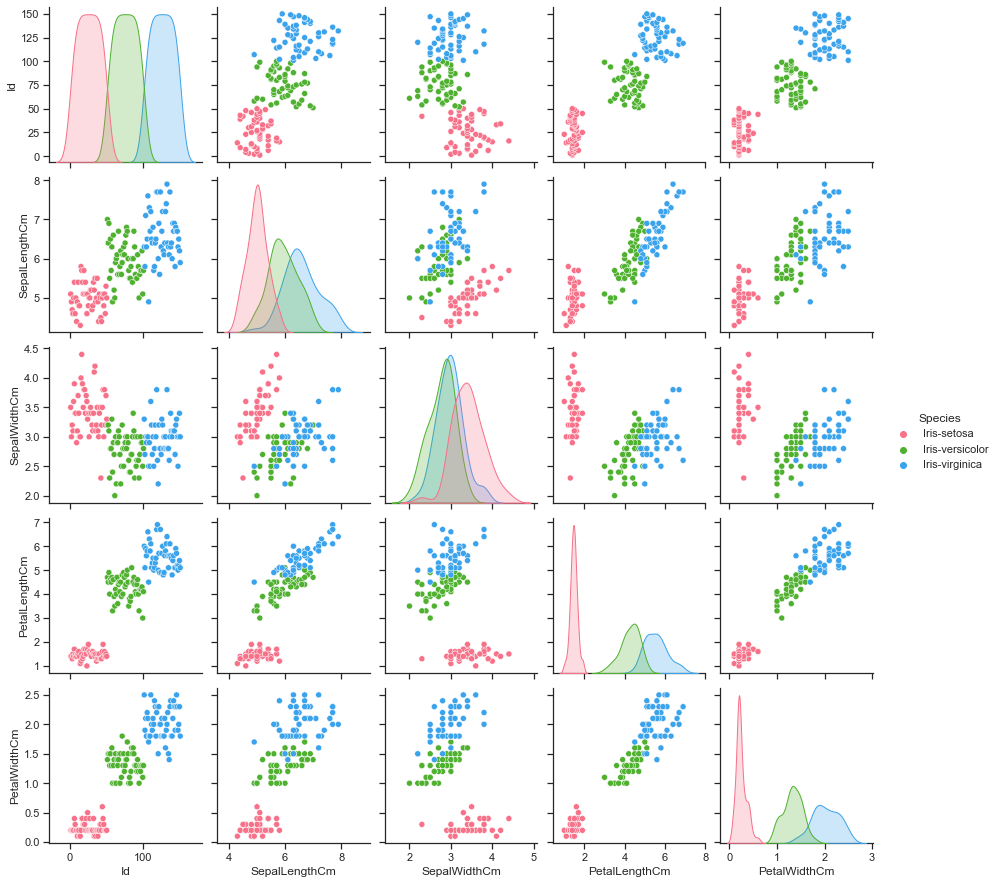

In [13]:
# 3개의 품종이 4개의 특성에 대해서 어떤 분포를 가지고 있는지 시각화해봅시다.
# seaborn의 pairplot은 데이터프레임을 입력으로 받아 데이터프레임의 각 열의 조합에 따라서 산점도(scatter plot)를 그립니다.
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="Species", palette="husl")

C:\Users\82102\anaconda3.1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

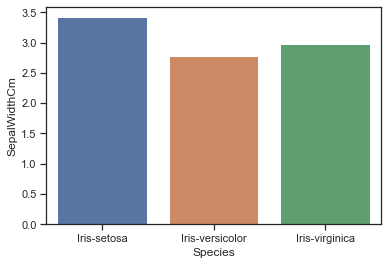

In [14]:
#  seaborn의 barplot을 통해 종과 특성에 대한 연관 관계를 출력할 수도 있습니다. 예를 들어 각 종에 따른 SepalWidthCm의 값을 확인해봅시다.
# 각 종과 특성에 대한 연관 관계
sns.barplot(data['Species'], data['SepalWidthCm'], ci=None)

<AxesSubplot:>

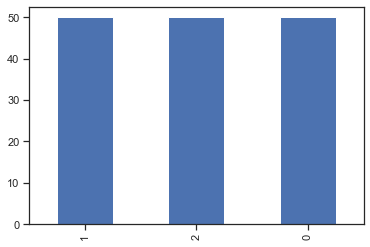

In [15]:
# Iris-virginica는 0, Iris-setosa는 1, Iris-versicolor는 2가 됨.
data['Species'] = data['Species'].replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2])
data['Species'].value_counts().plot(kind='bar')

In [16]:
# X 데이터. 특성은 총 4개.
data_X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Y 데이터. 예측 대상.
data_y = data['Species'].values

print(data_X[:5])
print(data_y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[1 1 1 1 1]


In [17]:
# 훈련 데이터와 테스트 데이터를 8:2로 나눈다.
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## 소프트맥스 회귀

* 입력의 차원이 4이므로 input_dim의 인자값이 4로 변경되었습니다. 출력의 차원이 3이므로 input_dim=4 앞의 인자값이 3입니다. 또한 활성화 함수로는 소프트맥스 함수를 사용하므로 activation의 인자값으로 'softmax'를 사용
* 전체 데이터에 대한 훈련 횟수는 200


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test, y_test))
# accuracy은 훈련 데이터에 대한 정확도
# val_accuracy은 테스트 데이터에 대한 정확도를 의미

Epoch 1/200
120/120 [==============================] - 1s 3ms/step - loss: 0.9433 - accuracy: 0.6417 - val_loss: 0.6758 - val_accuracy: 0.8000
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 0.6495 - accuracy: 0.8750 - val_loss: 0.6557 - val_accuracy: 0.7667
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.9083 - val_loss: 0.6510 - val_accuracy: 0.6667
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 0.5674 - accuracy: 0.8583 - val_loss: 0.6281 - val_accuracy: 0.7000
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 0.5513 - accuracy: 0.8750 - val_loss: 0.6092 - val_accuracy: 0.7000
Epoch 6/200
120/120 [==============================] - 0s 1ms/step - loss: 0.5357 - accuracy: 0.8583 - val_loss: 0.6075 - val_accuracy: 0.6667
Epoch 7/200
120/120 [==============================] - 0s 1ms/step - loss: 0.5207 - accuracy: 0.8833 - val_loss: 0.5996 - val_accuracy: 0.6667

Epoch 58/200
120/120 [==============================] - 0s 891us/step - loss: 0.2863 - accuracy: 0.9667 - val_loss: 0.3412 - val_accuracy: 0.9333
Epoch 59/200
120/120 [==============================] - 0s 862us/step - loss: 0.2847 - accuracy: 0.9667 - val_loss: 0.3424 - val_accuracy: 0.9333
Epoch 60/200
120/120 [==============================] - 0s 859us/step - loss: 0.2828 - accuracy: 0.9667 - val_loss: 0.3499 - val_accuracy: 0.8667
Epoch 61/200
120/120 [==============================] - 0s 997us/step - loss: 0.2804 - accuracy: 0.9583 - val_loss: 0.3501 - val_accuracy: 0.8667
Epoch 62/200
120/120 [==============================] - 0s 855us/step - loss: 0.2800 - accuracy: 0.9583 - val_loss: 0.3251 - val_accuracy: 0.9333
Epoch 63/200
120/120 [==============================] - 0s 830us/step - loss: 0.2780 - accuracy: 0.9667 - val_loss: 0.3235 - val_accuracy: 0.9333
Epoch 64/200
120/120 [==============================] - 0s 917us/step - loss: 0.2763 - accuracy: 0.9667 - val_loss: 0.3290 -

120/120 [==============================] - 0s 1ms/step - loss: 0.2047 - accuracy: 0.9833 - val_loss: 0.2562 - val_accuracy: 0.9333
Epoch 115/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2031 - accuracy: 0.9667 - val_loss: 0.2669 - val_accuracy: 0.9333
Epoch 116/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2039 - accuracy: 0.9833 - val_loss: 0.2599 - val_accuracy: 0.9333
Epoch 117/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2019 - accuracy: 0.9750 - val_loss: 0.2505 - val_accuracy: 0.9333
Epoch 118/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2002 - accuracy: 0.9667 - val_loss: 0.2469 - val_accuracy: 0.9667
Epoch 119/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2001 - accuracy: 0.9833 - val_loss: 0.2477 - val_accuracy: 0.9333
Epoch 120/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1990 - accuracy: 0.9667 - val_loss: 0.2533 - val_accuracy: 0.9333

120/120 [==============================] - 0s 1ms/step - loss: 0.1626 - accuracy: 0.9667 - val_loss: 0.2082 - val_accuracy: 0.9667
Epoch 171/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1600 - accuracy: 0.9833 - val_loss: 0.2015 - val_accuracy: 0.9667
Epoch 172/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1609 - accuracy: 0.9750 - val_loss: 0.2021 - val_accuracy: 0.9667
Epoch 173/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1592 - accuracy: 0.9667 - val_loss: 0.2005 - val_accuracy: 0.9667
Epoch 174/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1579 - accuracy: 0.9750 - val_loss: 0.1952 - val_accuracy: 0.9667
Epoch 175/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1583 - accuracy: 0.9667 - val_loss: 0.1995 - val_accuracy: 0.9667
Epoch 176/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.9750 - val_loss: 0.2120 - val_accuracy: 0.9333

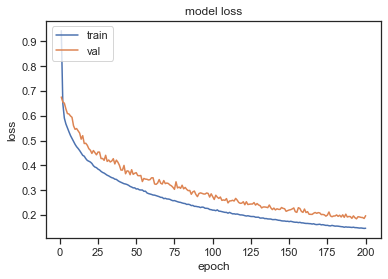

In [19]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# 케라스에서 테스트 데이터의 정확도를 측정하는 용도로 제공하고 있는 evaluate()를 통해 테스트 데이터에 대한 정확도를 다시 출력
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

# 딥 러닝(Deep Learning) 개요

* 머신 러닝(Machine Learning)의 특정한 한 분야로서 인공 신경망(Artificial Neural Network)의 층을 연속적으로 깊게 쌓아올려 데이터를 학습하는 방식

## 퍼셉트론(Perceptron)

* 딥 러닝을 이해하기 위해서는 우선 인공 신경망에 대한 이해가 필요
* 초기의 인공 신경망
* 실제 뇌를 구성하는 신경 세포 뉴런의 동작과 유사
* 활성화 함수(Activation Function) : 뉴런에서 출력값을 변경시키는 함수
* 시그모이드 함수나 소프트맥스 함수 또한 활성화 함수 중 하나

### 단층 퍼셉트론(Single-Layer Perceptron)

* 값을 보내는 단계과 값을 받아서 출력하는 두 단계로만 이루어집니다.
* 각 단계를 보통 층(layer)이라고 부르며, 이 두 개의 층을 입력층(input layer)과 출력층(output layer)

In [1]:
def AND_gate(x1, x2):
    w1 = 0.5
    w2 = 0.5
    b = -0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [2]:
AND_gate(0, 0), AND_gate(0, 1), AND_gate(1, 0), AND_gate(1, 1)

(0, 0, 0, 1)

In [3]:
# NAND 게이트
def NAND_gate(x1, x2):
    w1 = -0.5
    w2 = -0.5
    b = 0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [4]:
NAND_gate(0, 0), NAND_gate(0, 1), NAND_gate(1, 0), NAND_gate(1, 1)

(1, 1, 1, 0)

* XOR 게이트는 입력값 두 개가 서로 다른 값을 갖고 있을때에만 출력값이 1이 되고, 입력값 두 개가 서로 같은 값을 가지면 출력값이 0이 되는 게이트
* 단층 퍼셉트론으로는 XOR 게이트를 구현할 수 없습니다.

### 다층 퍼셉트론(MultiLayer Perceptron, MLP)

In [ ]:
# 다층 퍼셉트론과 단층 퍼셉트론의 차이는 단층 퍼셉트론은 입력층과 출력층만 존재하지만, 다층 퍼셉트론은 중간에 층을 더 추가하였다는 점
# 은닉층(hidden layer) : 입력층과 출력층 사이에 존재하는 층
# 은닉층이 1개 이상인 퍼셉트론
# 심층 신경망 : 은닉층이 2개 이상인 신경망

### 활성화 함수(Activation Function)

In [ ]:
# 활성화 함수(Activation function) : 은닉층과 출력층의 뉴런에서 출력값을 결정하는 함수
# 비선형 함수
# 인공 신경망의 능력을 높이기 위해서는 은닉층을 계속해서 추가해야 합니다. 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

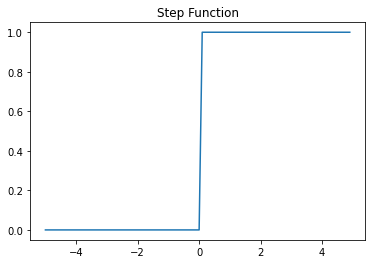

In [6]:
def step(x):
    return np.array(x > 0, dtype=np.int)
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = step(x)
plt.title('Step Function')
plt.plot(x,y)
plt.show()
# 계단 함수는 거의 사용되지 않지만 퍼셉트론을 통해 인공 신경망을 처음 배울 때 접하게 되는 활성화 함수

#### 시그모이드 함수(Sigmoid function)와 기울기 소실

우선 인공 신경망은 입력에 대해서 순전파(forward propagation) 연산을 하고, 그리고 순전파 연산을 통해 나온 예측값과 실제값의 오차를 손실 함수(loss function)을 통해 계산하고, 그리고 이 손실(오차라고도 부릅니다. loss)을 미분을 통해서 기울기(gradient)를 구하고, 이를 통해 출력층에서 입력층 방향으로 가중치와 편향을 업데이트 하는 과정인 역전파(back propagation)를 수행

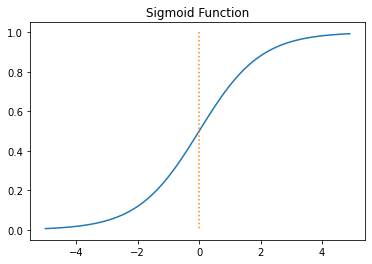

In [7]:
# 시그모이드 함수 그래프를 그리는 코드
def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

#### 하이퍼볼릭탄젠트 함수(Hyperbolic tangent function)

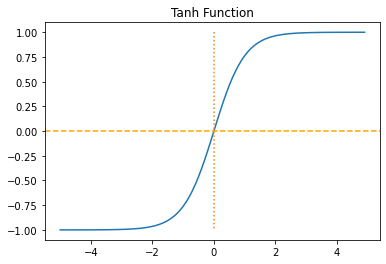

In [8]:
# 입력값을 -1과 1사이의 값으로 변환
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()
# 시그모이드 함수보다는 기울기 소실 증상이 적은 편이며 은닉층에서 시그모이드 함수보다는 선호

#### 렐루 함수(ReLU)

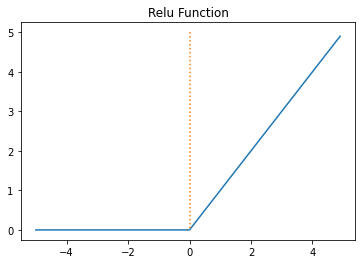

In [9]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

* 음수를 입력하면 0을 출력하고, 양수를 입력하면 입력값을 그대로 반환하는 것이 특징인 함수로 출력값이 특정 양수값에 수렴하지 않습니다.

#### 리키 렐루(Leaky ReLU)

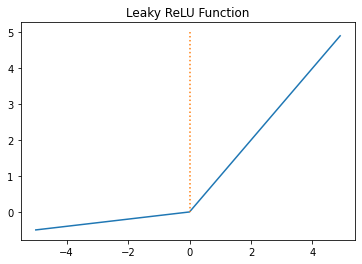

In [10]:
# 입력값이 음수일 경우에 0이 아니라 0.001과 같은 매우 작은 수를 반환하도록 되어있습니다. 
a = 0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()
# 입력값이 음수라도 기울기가 0이 되지 않으면 ReLU는 죽지 않습니다.

#### 소프트맥스 함수(Softamx function)

* 출력층에서 주로 사용
* 시그모이드 함수가 두 가지 선택지 중 하나를 고르는 이진 분류 (Binary Classification) 문제에 사용된다면 
* 소프트맥스 함수는 세 가지 이상의 (상호 배타적인) 선택지 중 하나를 고르는 다중 클래스 분류(MultiClass Classification) 문제에 주로 사용
* 딥 러닝으로 이진 분류를 할 때는 출력층에 앞서 배운 로지스틱 회귀
* 딥 러닝으로 다중 클래스 분류 문제를 풀 때는 출력층에 소프트맥스 회귀를 사용

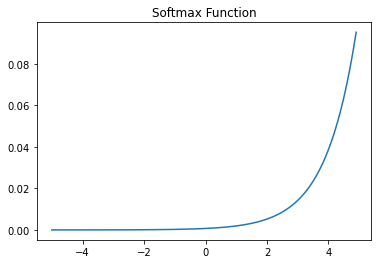

In [11]:
x = np.arange(-5.0, 5.0, 0.1) # -5.0부터 5.0까지 0.1 간격 생성
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

## 행렬곱으로 이해하는 신경망

### 순전파(Foward Propagation)

In [12]:
# 입력의 차원이 3, 출력의 차원이 2인 위 인공 신경망을 구현
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 3개의 입력과 2개의 출력
model.add(Dense(2, input_dim=3, activation='softmax'))
# 소프트맥스 회귀를 한다고 가정 활성화 함수는 소프트맥스 함수 임의로 기재
# 소프트맥스 회귀는 출력 벡터의 차원을 2로 두면 이진 분류를 수행하는 모델
# 로지스틱 회귀가 아닌 소프트맥스 회귀로도 이진 분류는 수행 가능함

In [13]:
# 케라스에서는 .summary()를 사용하면 해당 모델에 존재하는 모든 매개변수(가중치 w와 편향 b의 개수)를 확인
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


* 매개변수의 수가 8개라고 나옵니다.
* 신경망에서 학습가능한 매개변수 인 와 의 개수가 총 합해서 8개라는 의미
* 입력층의 뉴런이 3개, 출력층의 뉴런이 2개
* 3개의 뉴런과 2개의 뉴런 사이에는 총 6개의 화살표가 존재하는데, 이는 위 신경망에서 가중치 w의 개수가 6개임을 의미
* 편향 b의 개수는 항상 출력의 차원을 기준으로 개수를 확인하면 됩니다. 
* 위의 인공 신경망의 경우에는 출력의 차원이 2인데, 이에 따라서 편향 또한 b1과 b2로 두 개
* 가중치 의 개수가 w1, w2, w3, w4, w5, w6로 총 6개이며 편향 b의 개수가 b1과 b2로 두 개이므로 총 학습가능한 매개변수의 수는 8

### 행렬곱으로 다층 퍼셉트론의 순전파 이해하기

In [14]:
# 인공 신경망이 다수의 샘플을 동시에 처리하는 것을 우리는 '배치 연산'이라고 부릅니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

# 4개의 입력과 8개의 출력
model.add(Dense(8, input_dim=4, activation='relu'))

# 이어서 8개의 출력
model.add(Dense(8, activation='relu'))

# 이어서 3개의 출력
model.add(Dense(3, activation='softmax'))

* () 괄호 안의 값은 각 층에서의 뉴런의 수를 의미
* 입력층부터 출력층까지 순차적으로 인공 신경망의 층을 한 층씩 추가
* 입력층 : 4개의 입력과 8개의 출력
* 은닉층1 : 8개의 입력과 8개의 출력
* 은닉층2 : 8개의 입력과 3개의 출력
* 출력층 : 3개의 입력과 3개의 출력
* 은닉층과 출력층에 활성화 함수 relu와 softmax가 존재하지만 활성화 함수는 행렬의 크기에 영향을 주지 않습니다.
*  인공 신경망이 해야할 일은 예측값과 실제값으로부터 오차를 계산하고, 오차로부터 가중치와 편향을 업데이트하는 일
* 인공 신경망의 학습 단계에 해당
* 역전파(BackPropagation) : 인공 신경망은 순전파와는 반대 방향으로 연산을 진행하며 가중치를 업데이트

## 딥 러닝의 학습 방법

### 손실 함수(Loss function)

* 실제값과 예측값의 차이를 수치화해주는 함수
* 오차가 클 수록 손실 함수의 값은 크고 오차가 작을 수록 손실 함수의 값은 작아집니다. 

#### MSE(Mean Squared Error, MSE)

In [16]:
# 선형 회귀를 학습할 때 배웠던 손실 함수
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [18]:
import tensorflow as tf
model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(), metrics=['mse'])

#### 이진 크로스 엔트로피(Binary Cross-Entropy)

* 이항 교차 엔트로피
* 출력층에서 시그모이드 함수를 사용하는 이진 분류 (Binary Classification)의 경우 binary_crossentropy를 사용 -> compile의 loss에 문자열로 'binary_crossentropy'를 기재

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [20]:
# compile의 loss는 tf.keras.losses.Loss 인스턴스를 호출하므로 위 코드는 아래와 같이 사용
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer='adam', metrics=['acc'])

#### 카테고리칼 크로스 엔트로피(Categorical Cross-Entropy)

* 범주형 교차 엔트로피
* 출력층에서 소프트맥스 함수를 사용하는 다중 클래스 분류(Multi-Class Classification)일 경우 categorical_crossentropy를 사용 -> compile의 loss에 문자열로 'categorical_crossentropy'를 기재

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [22]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

In [23]:
# 레이블에 대해서 원-핫 인코딩 과정을 생략하고, 정수값을 가진 레이블에 대해서 다중 클래스 분류를 수행 -> 'sparse_categorical_crossentropy'를 사용
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [24]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), optimizer='adam', metrics=['acc'])

compile 코드에서 optimizer='adam' 이라는 부분에 주목해봅시다. 이는 아담이라는 옵티마이저를 사용했다라는 의미입니다. 손실 함수의 선정만큼이나 옵티마이저의 선정 또한 중요합니다. 이어서 옵티마이저에 대해서 정리

### 배치 크기(Batch Size)에 따른 경사 하강법

* 손실 함수의 값을 줄여나가면서 학습하는 방법은 어떤 옵티마이저를 사용하느냐에 따라 달라집니다. 
* 배치(Batch)라는 개념에 대한 이해가 필요
* 배치는 가중치 등의 매개 변수의 값을 조정하기 위해 사용하는 데이터의 양
* 전체 데이터를 가지고 매개 변수의 값을 조정할 수도 있고, 정해준 양의 데이터만 가지고도 매개 변수의 값을 조정할 수 있습니다.

#### 배치 경사 하강법(Batch Gradient Descent)

In [25]:
# 가장 기본적인 경사 하강법
# 옵티마이저 중 하나로 오차(loss)를 구할 때 전체 데이터를 고려
# 전체 데이터에 대한 한 번의 훈련 횟수를 1 에포크라고 하는데, 배치 경사 하강법은 한 번의 에포크에 모든 매개변수 업데이트를 단 한 번 수행
model.fit(X_train, y_train, batch_size=len(X_train))

NameError: name 'X_train' is not defined

#### 배치 크기가 1인 확률적 경사 하강법(Stochastic Gradient Descent, SGD)

In [ ]:
# 배치 크기가 1인 확률적 경사 하강법은 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 계산하는 방법
model.fit(X_train, y_train, batch_size=1)

#### 미니 배치 경사 하강법(Mini-Batch Gradient Descent)

In [ ]:
# 전체 데이터도, 1개의 데이터도 아닐 때, 배치 크기를 지정하여 해당 데이터 개수만큼에 대해서 계산하여 매개 변수의 값을 조정하는 경사 하강법
# 배치 크기를 128로 지정했을 경우
# 배치 크기는 일반적으로 2의 n제곱에 해당하는 숫자로 선택하는 것이 보편적
# model.fit()에서 배치 크기를 별도로 지정해주지 않을 경우에 기본값은 2의 5제곱에 해당하는 숫자인 32로 설정됩니다.
model.fit(X_train, y_train, batch_size=128)

### 옵티마이저(Optimizer)

#### 모멘텀(Momentum)

In [ ]:
# 경사 하강법에서 계산된 접선의 기울기에 한 시점 전의 접선의 기울기값을 일정한 비율만큼 반영
tf.keras.optimizers.SGD(lr=0.01, momentum=0.9)

#### 아다그라드(Adagrad)

In [ ]:
# 각 매개변수에 서로 다른 학습률을 적용
# 변화가 많은 매개변수는 학습률이 작게 설정되고 변화가 적은 매개변수는 학습률을 높게 설정
tf.keras.optimizers.Adagrad(lr=0.01, epsilon=1e-6)

#### 알엠에스프롭(RMSprop)

In [26]:
tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)

C:\Users\82102\anaconda3.1\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


#### 아담(Adam)

In [27]:
# 아담은 알엠에스프롭과 모멘텀 두 가지를 합친 듯한 방법
# 방향과 학습률 두 가지를 모두 잡기 위한 방법
tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [28]:
# 각 옵티마이저 인스턴스는 compile의 optimizer에서 호출
# 아담(adam)
adam = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
# 다른 방법
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

### 에포크와 배치 크기와 이터레이션(Epochs and Batch size and Iteration)

In [ ]:
# 학습: 실제값과 예측값의 오차로부터 옵티마이저를 통해 가중치를 업데이트

#### 에포크(Epoch)

In [ ]:
# 인공 신경망에서 전체 데이터에 대해서 순전파와 역전파가 끝난 상태
# 문제지의 모든 문제를 끝까지 다 풀고, 정답지로 채점을 하여 문제지에 대한 공부를 한 번 끝낸 상태
# 만약 에포크가 50이라고 하면, 전체 데이터 단위로는 총 50번 학습

#### 배치 크기(Batch size)

In [ ]:
# 몇 개의 데이터 단위로 매개변수를 업데이트 하는지
# 현실에 비유하면 문제지에서 몇 개씩 문제를 풀고나서 정답지를 확인하느냐의 문제
# 2,000 문제가 수록되어있는 문제지의 문제를 200개 단위로 풀고 채점한다고 하면 이때 배치 크기는 200입니다.
# 배치 크기가 200이면 200개의 샘플 단위로 가중치를 업데이트 합니다.
# 배치 크기와 배치의 수는 다른 개념
# 전체 데이터가 2,000일때 배치 크기를 200으로 준다면 배치의 수는 10입니다. 이는 에포크에서 배치 크기를 나눠준 값(2,000/200 = 10)이기도 합니다. 이때 배치의 수를 이터레이션이라고 합니다.

#### 이터레이션(Iteration) 또는 스텝(Step)

In [ ]:
# 이터레이션: 한 번의 에포크를 끝내기 위해서 필요한 배치의 수
# 이터레이션: 한 번의 에포크 내에서 이루어지는 매개변수의 업데이트 횟수
# 전체 데이터가 2,000일 때 배치 크기를 200으로 한다면 이터레이션의 수는 총 10
# 한 번의 에포크 당 매개변수 업데이트가 10번 이루어진다는 것을 의미

## 과적합(Overfitting)을 막는 방법들

* 데이터의 양을 늘리기
* 모델의 복잡도 줄이기 -> 인공 신경망의 복잡도는 은닉층(hidden layer)의 수나 매개변수의 수 등으로 결정
* 가중치 규제(Regularization) 적용하기 -> 복잡한 모델을 좀 더 간단하게 하는 방법으로 가중치 규제(Regularization)가 있습니다.
* 드롭아웃(Dropout) : 학습 과정에서 신경망의 일부를 사용하지 않는 방법 -> 드롭아웃은 신경망 학습 시에만 사용하고, 예측 시에는 사용하지 않는 것이 일반적입니다. 학습 시에 인공 신경망이 특정 뉴런 또는 특정 조합에 너무 의존적이게 되는 것을 방지해주고, 매번 랜덤 선택으로 뉴런들을 사용하지 않으므로 서로 다른 신경망들을 앙상블하여 사용하는 것 같은 효과를 내어 과적합을 방지

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

max_words = 10000
num_classes = 46

model = Sequential()
model.add(Dense(256, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # 드롭아웃 추가. 비율은 50%
model.add(Dense(num_classes, activation='softmax'))

## 기울기 소실(Gradient Vanishing)과 폭주(Exploding)

* 역전파 과정에서 입력층으로 갈 수록 기울기(Gradient)가 점차적으로 작아지는 현상이 발생할 수 있습니다. 입력층에 가까운 층들에서 가중치들이 업데이트가 제대로 되지 않으면 결국 최적의 모델을 찾을 수 없게 됩니다. 이를 기울기 소실(Gradient Vanishing) 이라고 합니다.
* 기울기가 점차 커지더니 가중치들이 비정상적으로 큰 값이 되면서 결국 발산되기도 합니다. 이를 기울기 폭주(Gradient Exploding) 

### ReLU와 ReLU의 변형들

* 시그모이드 함수를 사용하면 입력의 절대값이 클 경우에 시그모이드 함수의 출력값이 0 또는 1에 수렴하면서 기울기가 0에 가까워집니다. -> 기울기 소실 문제가 발생
* 기울기 소실을 완화하는 가장 간단한 방법: 은닉층의 활성화 함수로 시그모이드나 하이퍼볼릭탄젠트 함수 대신에 ReLU나 ReLU의 변형 함수와 같은 Leaky ReLU를 사용하는 것

### 그래디언트 클리핑(Gradient Clipping)

In [30]:
# 말 그대로 기울기 값을 자르는 것
# 기울기 폭주를 막기 위해 임계값을 넘지 않도록 값을 자릅니다. 
from tensorflow.keras import optimizers

Adam = optimizers.Adam(lr=0.0001, clipnorm=1.)

### 가중치 초기화(Weight initialization)

* 가중치 초기화만 적절히 해줘도 기울기 소실 문제과 같은 문제를 완화시킬 수 있습니다.
* 세이비어(Xavier Initialization) 초기화: 시그모이드 함수나 하이퍼볼릭 탄젠트 함수와 같은 S자 형태인 활성화 함수와 함께 사용할 경우에는 좋은 성능을 보인다.
* He 초기화(He initialization): ReLU 계열 함수를 사용할 경우에는 He 초기화 방법이 효율적

### 배치 정규화(Batch Normalization)

In [ ]:
# 기울기 소실이나 폭주를 예방하는 또 다른 방법은 배치 정규화(Batch Normalization)
# 인공 신경망의 각 층에 들어가는 입력을 평균과 분산으로 정규화하여 학습을 효율적으로 만듭니다.
# 한 번에 들어오는 배치 단위로 정규화하는 것을 말합니다.
# 각 층에서 활성화 함수를 통과하기 전에 수행

## 케라스(Keras) 훑어보기

### 전처리(Preprocessing)

In [31]:
# Tokenizer() : 토큰화와 정수 인코딩을 위해 사용
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
train_text = "The earth is an awesome place live"

# 단어 집합 생성
tokenizer.fit_on_texts([train_text])

# 정수 인코딩
sub_text = "The earth is an great place live"
sequences = tokenizer.texts_to_sequences([sub_text])[0]

print("정수 인코딩 : ",sequences)
print("단어 집합 : ",tokenizer.word_index)

정수 인코딩 :  [1, 2, 3, 4, 6, 7]
단어 집합 :  {'the': 1, 'earth': 2, 'is': 3, 'an': 4, 'awesome': 5, 'place': 6, 'live': 7}


In [32]:
# pad_sequence() : 모든 샘플의 길이를 동일하게 맞춤
# pad_sequence()는 정해준 길이보다 길이가 긴 샘플은 값을 일부 자르고, 
# 정해준 길이보다 길이가 짧은 샘플은 값을 0으로 채웁니다.
pad_sequences([[1, 2, 3], [3, 4, 5, 6], [7, 8]], maxlen=3, padding='pre')

array([[1, 2, 3],
       [4, 5, 6],
       [0, 7, 8]])

* 첫번째 인자 = 패딩을 진행할 데이터
* maxlen = 모든 데이터에 대해서 정규화 할 길이
* padding = 'pre'를 선택하면 앞에 0을 채우고 'post'를 선택하면 뒤에 0을 채움.

### 워드 임베딩(Word Embedding)

* 텍스트 내의 단어들을 밀집 벡터(dense vector)로 만드는 것
* 상대적으로 저차원이며 실수값
* Embedding() : 단어를 밀집 벡터로 만드는 역할을 합니다. 인공 신경망 용어로는 임베딩 층(embedding layer)을 만드는 역할을 합니다. Embedding()은 정수 인코딩이 된 단어들을 입력을 받아서 임베딩을 수행합니다.

In [ ]:
# 1. 토큰화
tokenized_text = [['Hope', 'to', 'see', 'you', 'soon'], ['Nice', 'to', 'see', 'you', 'again']]

# 2. 각 단어에 대한 정수 인코딩
encoded_text = [[0, 1, 2, 3, 4],[5, 1, 2, 3, 6]]

# 3. 위 정수 인코딩 데이터가 아래의 임베딩 층의 입력이 된다.
vocab_size = 7
embedding_dim = 2
Embedding(vocab_size, embedding_dim, input_length=5)

# 각 정수는 아래의 테이블의 인덱스로 사용되며 Embedding()은 각 단어마다 임베딩 벡터를 리턴한다.
+------------+------------+
|   index    | embedding  |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

# 위의 표는 임베딩 벡터가 된 결과를 예로서 정리한 것이고 Embedding()의 출력인 3D 텐서를 보여주는 것이 아님.

* 첫번째 인자 = 단어 집합의 크기. 즉, 총 단어의 개수
* 두번째 인자 = 임베딩 벡터의 출력 차원. 결과로서 나오는 임베딩 벡터의 크기
* input_length = 입력 시퀀스의 길이

### 모델링(Modeling)

In [ ]:
# Sequential()을 model로 선언한 뒤에 model.add()라는 코드를 통해 층을 단계적으로 추가
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(...) # 층 추가
model.add(...) # 층 추가
model.add(...) # 층 추가
# 실제로는 세 개의 온점 대신에 층의 이름을 기재

In [33]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim, input_length))

NameError: name 'Embedding' is not defined

In [34]:
# 전결합층(fully-connected layer)을 추가하는 예시
model = Sequential()
model.add(Dense(1, input_dim=3, activation='relu'))
# Dense()의 의미-> 첫번째 인자의 값은 1: 총 1개의 출력 뉴런을 의미
# Dense()의 두번째 인자인 input_dim은 입력층의 뉴런 수를 의미
# -> 3개의 입력층 뉴런과 1개의 출력층 뉴런을 만들었습니다.

In [ ]:
* 첫번째 인자 = 출력 뉴런의 수.
* input_dim = 입력 뉴런의 수. (입력의 차원)
* activation = 활성화 함수.
* linear : 디폴트 값으로 별도 활성화 함수 없이 입력 뉴런과 가중치의 계산 결과 그대로 출력.
* sigmoid : 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수
* softmax : 셋 이상의 선택지 중 하나를 택하는 다중 클래스 분류 문제에서 출력층에 주로 사용되는 활성화 함수.
* relu : 은닉층에 주로 사용되는 활성화 함수

In [35]:
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(1, activation='sigmoid')) # 출력층
# 첫번째 사용된 Dense()의 8이라는 값 : 은닉층의 뉴런 

In [36]:
# summary() : 모델의 정보를 요약해서 보여줍니다.
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


### 컴파일(Compile)과 훈련(Training)

In [ ]:
# 임베딩층, 은닉층, 출력층을 추가하여 모델을 설계한 후 마지막으로 컴파일.
# compile() : 모델을 기계가 이해할 수 있도록 컴파일 합니다. 손실 함수와 옵티마이저, 메트릭 함수를 선택

In [37]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

vocab_size = 10000
embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

* optimizer = 훈련 과정을 설정하는 옵티마이저를 설정합니다.
* loss = 훈련 과정에서 사용할 손실 함수(loss function)를 설정합니다.
* metrics = 훈련을 모니터링하기 위한 지표를 선택합니다.

In [38]:
# fit() : 모델을 학습
# 위의 compile() 코드의 연장선상인 코드
model.fit(X_train, y_train, epochs=10, batch_size=32)

NameError: name 'X_train' is not defined

In [ ]:
* 첫번째 인자 = 훈련 데이터에 해당됩니다.
* 두번째 인자 = 지도 학습에서 레이블 데이터에 해당됩니다.
* epochs = 에포크. 에포크 1은 전체 데이터를 한 차례 훑고 지나갔음을 의미함. 정수값 기재 필요. 총 훈련 횟수를 정의합니다.
* batch_size = 배치 크기. 기본값은 32. 미니 배치 경사 하강법을 사용하고 싶지 않을 경우에는 batch_size=None을 기재합니다.

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data(X_val, y_val))

* validation_data(x_val, y_val) = 검증 데이터(validation data)를 사용
* 검증 데이터를 학습하지는 않습니다. 검증 데이터의 오차(loss)가 낮아지다가 높아지기 시작하면 이는 과적합(overfitting)의 신호
* validation_split = validation_data와 동일하게 검증 데이터를 사용하기 위한 용도로 validation_data 대신 사용할 수 있습니다.
*  훈련 데이터와 훈련 데이터의 레이블인 X_train과 y_train에서 일정 비율 분리하여 이를 검증 데이터로 사용

In [ ]:
# 훈련 데이터의 20%를 검증 데이터로 사용.
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2))

* verbose = 학습 중 출력되는 문구를 설정합니다.
- 0 : 아무 것도 출력하지 않습니다.
- 1 : 훈련의 진행도를 보여주는 진행 막대를 보여줍니다.
- 2 : 미니 배치마다 손실 정보를 출력합니다.

* verbose = 1일 경우.
* Epoch 88/100
* 7/7 [==============================] - 0s 143us/step - loss: 0.1029 - acc: 1.0000

* verbose = 2일 경우.
* Epoch 88/100
* - 0s - loss: 0.1475 - acc: 1.0000

### 평가(Evaluation)와 예측(Prediction)

In [ ]:
# evaluate() : 테스트 데이터를 통해 학습한 모델에 대한 정확도를 평가
# 위의 fit() 코드의 연장선상인 코드
model.evaluate(X_test, y_test, batch_size=32)

In [ ]:
# predict() : 임의의 입력에 대한 모델의 출력값을 확인
# 위의 fit() 코드의 연장선상인 코드
model.predict(X_input, batch_size=32)

### 모델의 저장(Save)과 로드(Load)

In [ ]:
model.save("model_name.h5")
# save() : 인공 신경망 모델을 hdf5 파일에 저장

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_name.h5")
# load_model() : 저장해둔 모델을 불러옵니다.

## 케라스의 함수형 API(Keras Functional API)

In [ ]:
# 더욱 복잡한 모델을 생성

### Sequential API로 만든 모델

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))

* 단순히 층을 쌓는 것만으로는 구현할 수 없는 복잡한 신경망을 구현할 수 없습니다.
* 초심자에게 적합한 API이지만, 전문가가 되기 위해서는 결과적으로 Functional API를 학습해야 합니다.

### Functional API로 만든 모델

In [ ]:
* 각 층을 일종의 함수(function)로서 정의

#### 전결합 피드 포워드 신경망(Fully-connected FFNN)

In [ ]:
# 입력 데이터의 크기(shape)를 인자로 입력층을 정의해주어야 합니다. 
# 피드 포워드 신경망(Fully-connected FFNN)을 만든다고 가정

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
inputs = Input(shape=(10,))

In [ ]:
# 위의 코드에 은닉층과 출력층을 추가
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)  # <- 새로 추가
hidden2 = Dense(64, activation='relu')(hidden1) # <- 새로 추가
output = Dense(1, activation='sigmoid')(hidden2) # <- 새로 추가

In [ ]:
# 위의 코드를 하나의 모델로 구성
inputs = Input(shape=(10,))
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(64, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=inputs, outputs=output) # <- 새로 추가

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(data, labels)

In [ ]:
# 이번에는 변수명을 달리해서 FFNN을 만들어보겠습니다. 
# 이번에는 은닉층과 출력층의 변수를 전부 x로 통일
inputs = Input(shape=(10,))
x = Dense(8, activation="relu")(inputs)
x = Dense(4, activation="relu")(x)
x = Dense(1, activation="linear")(x)
model = Model(inputs, x)

#### 선형 회귀(Linear Regression)

In [40]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 378ms/step - loss: 4790.1533 - mse: 4790.1533
Epoch 2/300
1/1 [==============================] - 0s 37ms/step - loss: 590.5436 - mse: 590.5436
Epoch 3/300
1/1 [==============================] - 0s 43ms/step - loss: 73.8113 - mse: 73.8113
Epoch 4/300
1/1 [==============================] - 0s 36ms/step - loss: 10.2294 - mse: 10.2294
Epoch 5/300
1/1 [==============================] - 0s 39ms/step - loss: 2.4044 - mse: 2.4044
Epoch 6/300
1/1 [==============================] - 0s 40ms/step - loss: 1.4398 - mse: 1.4398
Epoch 7/300
1/1 [==============================] - 0s 40ms/step - loss: 1.3194 - mse: 1.3194
Epoch 8/300
1/1 [==============================] - 0s 41ms/step - loss: 1.3028 - mse: 1.3028
Epoch 9/300
1/1 [==============================] - 0s 37ms/step - loss: 1.2990 - mse: 1.2990
Epoch 10/300
1/1 [==============================] - 0s 38ms/step - loss: 1.2968 - mse: 1.2968
Epoch 11/300
1/1 [==============================] - 0s

1/1 [==============================] - 0s 6ms/step - loss: 1.1208 - mse: 1.1208
Epoch 176/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1203 - mse: 1.1203
Epoch 177/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1198 - mse: 1.1198
Epoch 178/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1193 - mse: 1.1193
Epoch 179/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1188 - mse: 1.1188
Epoch 180/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1183 - mse: 1.1183
Epoch 181/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1179 - mse: 1.1179
Epoch 182/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1174 - mse: 1.1174
Epoch 183/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1169 - mse: 1.1169
Epoch 184/300
1/1 [==============================] - 0s 4ms/step - loss: 1.1164 - mse: 1.1164
Epoch 185/300
1/1 [==============================] - 0s 5ms/step - loss: 1

#### 로지스틱 회귀(Logistic Regression)

In [41]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

inputs = Input(shape=(3,))
output = Dense(1, activation='sigmoid')(inputs)
logistic_model = Model(inputs, output)

#### 다중 입력을 받는 모델(model that accepts multiple inputs)

In [42]:
# 최종 완성된 다중 입력, 다중 출력 모델의 예
model = Model(inputs=[a1, a2], outputs=[b1, b2, b3])

NameError: name 'a1' is not defined

In [43]:
from tensorflow.keras.layers import Input, Dense, concatenate
from tensorflow.keras.models import Model

# 두 개의 입력층을 정의
inputA = Input(shape=(64,))
inputB = Input(shape=(128,))

# 첫번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
x = Dense(16, activation="relu")(inputA)
x = Dense(8, activation="relu")(x)
x = Model(inputs=inputA, outputs=x)

# 두번째 입력층으로부터 분기되어 진행되는 인공 신경망을 정의
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Dense(8, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# 두개의 인공 신경망의 출력을 연결(concatenate)
result = concatenate([x.output, y.output])

z = Dense(2, activation="relu")(result)
z = Dense(1, activation="linear")(z)

model = Model(inputs=[x.input, y.input], outputs=z)
# 두 개의 입력층으로부터 분기되어 진행된 후 마지막에는 하나의 출력을 예측하는 모델

#### RNN(Recurrence Neural Network) 은닉층 사용하기

In [46]:
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model

inputs = Input(shape=(50,1))
lstm_layer = LSTM(10)(inputs)
x = Dense(10, activation='relu')(lstm_layer)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=output)
print(model)

In [47]:
result = Dense(128)(input)

TypeError: Inputs to a layer should be tensors. Got: <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x00000166B9B444C0>>

In [48]:
# 위 코드는 아래와 같이 두 개의 줄로 표현할 수 있습니다.
dense = Dense(128)
result = dense(input)

TypeError: Inputs to a layer should be tensors. Got: <bound method Kernel.raw_input of <ipykernel.ipkernel.IPythonKernel object at 0x00000166B9B444C0>>

## 케라스 서브클래싱 API(Keras Subclassing API)

### 서브클래싱 API로 구현한 선형 회귀

In [49]:
import tensorflow as tf

In [50]:
class LinearRegression(tf.keras.Model):
  def __init__(self):
    super(LinearRegression, self).__init__()
    self.linear_layer = tf.keras.layers.Dense(1, input_dim=1, activation='linear')

  def call(self, x):
    y_pred = self.linear_layer(x)

    return y_pred

In [51]:
model = LinearRegression()

In [52]:
X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [53]:
sgd = tf.keras.optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 379ms/step - loss: 2926.3171 - mse: 2926.3171
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 361.0767 - mse: 361.0767
Epoch 3/300
1/1 [==============================] - 0s 41ms/step - loss: 45.4422 - mse: 45.4422
Epoch 4/300
1/1 [==============================] - 0s 26ms/step - loss: 6.6051 - mse: 6.6051
Epoch 5/300
1/1 [==============================] - 0s 35ms/step - loss: 1.8258 - mse: 1.8258
Epoch 6/300
1/1 [==============================] - 0s 33ms/step - loss: 1.2370 - mse: 1.2370
Epoch 7/300
1/1 [==============================] - 0s 11ms/step - loss: 1.1639 - mse: 1.1639
Epoch 8/300
1/1 [==============================] - 0s 3ms/step - loss: 1.1542 - mse: 1.1542
Epoch 9/300
1/1 [==============================] - 0s 9ms/step - loss: 1.1524 - mse: 1.1524
Epoch 10/300
1/1 [==============================] - 0s 6ms/step - loss: 1.1515 - mse: 1.1515
Epoch 11/300
1/1 [==============================] - 0s 6ms/

1/1 [==============================] - 0s 4ms/step - loss: 1.0834 - mse: 1.0834
Epoch 176/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0832 - mse: 1.0832
Epoch 177/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0830 - mse: 1.0830
Epoch 178/300
1/1 [==============================] - 0s 5ms/step - loss: 1.0829 - mse: 1.0829
Epoch 179/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0827 - mse: 1.0827
Epoch 180/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0825 - mse: 1.0825
Epoch 181/300
1/1 [==============================] - 0s 4ms/step - loss: 1.0823 - mse: 1.0823
Epoch 182/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0821 - mse: 1.0821
Epoch 183/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0819 - mse: 1.0819
Epoch 184/300
1/1 [==============================] - 0s 3ms/step - loss: 1.0817 - mse: 1.0817
Epoch 185/300
1/1 [==============================] - 0s 7ms/step - loss: 1

### 언제 서브클래싱 API를 써야 할까?

* 간단한 모델을 구현하기에 적합
* Functional API로도 구현할 수 없는 모델들조차 구현이 가능합니다.

## 다층 퍼셉트론(MultiLayer Perceptron, MLP)으로 텍스트 분류하기

### 다층 퍼셉트론(MultiLayer Perceptron, MLP)

* 단층 퍼셉트론의 형태에서 은닉층이 1개 이상 추가된 신경망을 다층 퍼셉트론(MLP)
* 다층 퍼셉트론은 피드 포워드 신경망(Feed Forward Neural Network, FFNN)(입력층에서 출력층으로 오직 한 방향으로만 연산 방향이 정해져 있는 신경망)의 가장 기본적인 형태

### 케라스의 texts_to_matrix() 이해하기

In [54]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [55]:
texts = ['먹고 싶은 사과', '먹고 싶은 바나나', '길고 노란 바나나 바나나', '저는 과일이 좋아요']

In [56]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)


{'바나나': 1, '먹고': 2, '싶은': 3, '사과': 4, '길고': 5, '노란': 6, '저는': 7, '과일이': 8, '좋아요': 9}


In [57]:
# texts_to_matrix()란 이름에서 알 수 있지만, 이 도구는 입력된 텍스트 데이터로부터 행렬(matrix)를 만드는 도구
print(tokenizer.texts_to_matrix(texts, mode = 'count')) # texts_to_matrix의 입력으로 texts를 넣고, 모드는 'count'
# 'count'를 사용하면 우리가 앞서 배운 문서 단어 행렬(Document-Term Matrix, DTM)을 생성

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [58]:
print(tokenizer.texts_to_matrix(texts, mode = 'binary'))
# 'binary' : 해당 단어가 존재하는지만 관심. 해당 단어가 몇 개인지는 무시
# 해당 단어가 존재하면 1, 단어가 존재하지 않으면 0의 값을 가집니다. 

[[0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]]


In [59]:
print(tokenizer.texts_to_matrix(texts, mode = 'tfidf').round(2)) # 둘째 자리까지 반올림하여 출력
# TF-IDF 행렬을 만듭니다.
# 각 문서에서의 각 단어의 빈도에 자연 로그를 씌우고 1을 더한 값으로 정의

[[0.   0.   0.85 0.85 1.1  0.   0.   0.   0.   0.  ]
 [0.   0.85 0.85 0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   1.43 0.   0.   0.   1.1  1.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.1  1.1  1.1 ]]


In [60]:
print(tokenizer.texts_to_matrix(texts, mode = 'freq').round(2)) # 둘째 자리까지 반올림하여 출력
# 'freq' 모드는 각 문서에서의 각 단어의 등장 횟수를 분자로, 각 문서의 크기(각 문서에서 등장한 모든 단어의 개수의 총 합)를 분모로 하는 표현 방법
# 문서의 크기는 4인데, 바나나는 총 2회 등장했습니다. 이에 따라서 세번째 문장에서의 단어 '바나나'의 값은 위의 행렬에서 0.5가 됩니다.

[[0.   0.   0.33 0.33 0.33 0.   0.   0.   0.   0.  ]
 [0.   0.33 0.33 0.33 0.   0.   0.   0.   0.   0.  ]
 [0.   0.5  0.   0.   0.   0.25 0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.33 0.33 0.33]]


### 20개 뉴스 그룹(Twenty Newsgroups) 데이터에 대한 이해

In [61]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

In [62]:
newsdata = fetch_20newsgroups(subset = 'train') # 'train'을 기재하면 훈련 데이터만 리턴한다.

* 위의 subset의 값으로 'all'을 넣으면 전체 데이터인 18,846개의 샘플을 다운로드할 수 있으며, 'train'을 넣으면 훈련 데이터를, 'test'를 넣으면 테스트 데이터를 다운로드할 수 있습니다.

In [63]:
print(newsdata.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


실제로 훈련에 사용할 속성은 이메일 본문인 data와 메일이 어떤 주제인지 기재된 숫자 레이블인 target

In [64]:
print('훈련용 샘플의 개수 : {}'.format(len(newsdata.data)))

훈련용 샘플의 개수 : 11314


In [65]:
print('총 주제의 개수 : {}'.format(len(newsdata.target_names)))
print(newsdata.target_names)

총 주제의 개수 : 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [66]:
# 첫번째 샘플의 경우에는 몇 번 주제인지 확인
print('첫번째 샘플의 레이블 : {}'.format(newsdata.target[0]))

첫번째 샘플의 레이블 : 7


In [67]:
print('7번 레이블이 의미하는 주제 : {}'.format(newsdata.target_names[7]))
#  첫번째 샘플의 주제: rec.autos

7번 레이블이 의미하는 주제 : rec.autos


In [68]:
print(newsdata.data[0]) # 첫번째 샘플 출력

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [69]:
# data로부터 데이터프레임을 생성하고, target 열을 추가한 뒤에 상위 5개의 행을 출력
data = pd.DataFrame(newsdata.data, columns = ['email'])
data['target'] = pd.Series(newsdata.target)
data[:5]

,email,target
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11314 entries, 0 to 11313
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   11314 non-null  object
 1   target  11314 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 132.7+ KB


In [71]:
# 혹시 Null 값을 가진 샘플이 있는지 isnull().values.any()로도 확인 가능합니다.
data.isnull().values.any()

False

In [72]:
print('중복을 제외한 샘플의 수 : {}'.format(data['email'].nunique()))
print('중복을 제외한 주제의 수 : {}'.format(data['target'].nunique()))

중복을 제외한 샘플의 수 : 11314
중복을 제외한 주제의 수 : 20


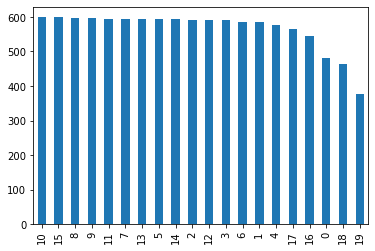

In [73]:
data['target'].value_counts().plot(kind='bar');

In [74]:
print(data.groupby('target').size().reset_index(name='count'))

    target  count
0        0    480
1        1    584
2        2    591
3        3    590
4        4    578
5        5    593
6        6    585
7        7    594
8        8    598
9        9    597
10      10    600
11      11    595
12      12    591
13      13    594
14      14    593
15      15    599
16      16    546
17      17    564
18      18    465
19      19    377


In [75]:
newsdata_test = fetch_20newsgroups(subset='test', shuffle=True)
train_email = data['email']
train_label = data['target']
test_email = newsdata_test.data
test_label = newsdata_test.target

In [76]:
vocab_size = 10000 # 최대 단어 개수를 정의, 빈도수가 가장 높은 상위 vocab_size 개수만큼의 단어를 사용
num_classes = 20

In [77]:
# 케라스 토크나이저로 전처리를 수행하는 함수
def prepare_data(train_data, test_data, mode): # 전처리 함수
    tokenizer = Tokenizer(num_words = vocab_size) # vocab_size 개수만큼의 단어만 사용한다.
    tokenizer.fit_on_texts(train_data)
    X_train = tokenizer.texts_to_matrix(train_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    X_test = tokenizer.texts_to_matrix(test_data, mode=mode) # 샘플 수 × vocab_size 크기의 행렬 생성
    return X_train, X_test, tokenizer.index_word
# 케라스 토크나이저를 통해 단어 토큰화를 수행하고, 앞서 배운 texts_to_matrix()를 사용하여 훈련 데이터와 테스트 데이터를 'binary', 'count', 'tfidf', 'freq' 4개의 모드 중 사용자가 정한 모드로 변환

In [78]:
X_train, X_test, index_to_word = prepare_data(train_email, test_email, 'binary') # binary 모드로 변환
y_train = to_categorical(train_label, num_classes) # 원-핫 인코딩
y_test = to_categorical(test_label, num_classes) # 원-핫 인코딩

In [79]:
print('훈련 샘플 본문의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 본문의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 본문의 크기 : (11314, 10000)
훈련 샘플 레이블의 크기 : (11314, 20)
테스트 샘플 본문의 크기 : (7532, 10000)
테스트 샘플 레이블의 크기 : (7532, 20)


In [80]:
print('빈도수 상위 1번 단어 : {}'.format(index_to_word[1]))
print('빈도수 상위 9999번 단어 : {}'.format(index_to_word[9999]))

빈도수 상위 1번 단어 : the
빈도수 상위 9999번 단어 : mic


### 다층 퍼셉트론(Multilayer Perceptron, MLP)을 사용하여 텍스트 분류하기

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def fit_and_evaluate(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(256, input_shape=(vocab_size,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.1)
    score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
    return score[1]

In [82]:
modes = ['binary', 'count', 'tfidf', 'freq'] # 4개의 모드를 리스트에 저장.

for mode in modes: # 4개의 모드에 대해서 각각 아래의 작업을 반복한다.
    X_train, X_test, _ = prepare_data(train_email, test_email, mode) # 모드에 따라서 데이터를 전처리
    score = fit_and_evaluate(X_train, y_train, X_test, y_test) # 모델을 훈련하고 평가.
    print(mode+' 모드의 테스트 정확도:', score)

Epoch 1/5
80/80 [==============================] - 3s 25ms/step - loss: 2.3317 - accuracy: 0.3261 - val_loss: 1.0206 - val_accuracy: 0.788919 - 
Epoch 2/5
80/80 [==============================] - 2s 22ms/step - loss: 0.9296 - accuracy: 0.7402 - val_loss: 0.4818 - val_accuracy: 0.8878
Epoch 3/5
80/80 [==============================] - 2s 26ms/step - loss: 0.4539 - accuracy: 0.8801 - val_loss: 0.3554 - val_accuracy: 0.8993
Epoch 4/5
80/80 [==============================] - 2s 27ms/step - loss: 0.2723 - accuracy: 0.9311 - val_loss: 0.3206 - val_accuracy: 0.9064
Epoch 5/5
80/80 [==============================] - 2s 28ms/step - loss: 0.1802 - accuracy: 0.9544 - val_loss: 0.2982 - val_accuracy: 0.9152
binary 모드의 테스트 정확도: 0.8307222723960876
Epoch 1/5
80/80 [==============================] - 4s 38ms/step - loss: 2.7693 - accuracy: 0.2508 - val_loss: 1.4992 - val_accuracy: 0.7615
Epoch 2/5
80/80 [==============================] - 3s 37ms/step - loss: 1.3607 - accuracy: 0.6468 - val_loss: 0.6451

## 피드 포워드 신경망 언어 모델(Neural Network Language Model, NNLM)

In [ ]:
# 신경망 언어 모델의 시초

#### 피드 포워드 신경망 언어 모델(NNLM)

만약 언어 모델 또한 단어의 의미적 유사성을 학습할 수 있도록 설계한다면, 훈련 코퍼스에 없는 단어 시퀀스에 대한 예측이라도 유사한 단어가 사용된 단어 시퀀스를 참고하여 보다 정확한 예측을 할 수 있습니다. 그리고 이러한 아이디어를 반영한 언어 모델이 신경망 언어 모델 NNLM

In [ ]:
what = [1, 0, 0, 0, 0, 0, 0]
will = [0, 1, 0, 0, 0, 0, 0]
the = [0, 0, 1, 0, 0, 0, 0]
fat = [0, 0, 0, 1, 0, 0, 0]
cat = [0, 0, 0, 0, 1, 0, 0]
sit = [0, 0, 0, 0, 0, 1, 0]
on = [0, 0, 0, 0, 0, 0, 1]

# 순환 신경망(Recurrent Neural Network, RNN)

## 케라스(Keras)로 RNN 구현하기

In [1]:
from tensorflow.keras.layers import SimpleRNN

model.add(SimpleRNN(hidden_units))

NameError: name 'model' is not defined

In [ ]:
# 추가 인자를 사용할 때
model.add(SimpleRNN(hidden_units, input_shape=(timesteps, input_dim)))

# 다른 표기
model.add(SimpleRNN(hidden_units, input_length=M, input_dim=N))

* hidden_units = 은닉 상태의 크기를 정의. 메모리 셀이 다음 시점의 메모리 셀과 출력층으로 보내는 값의 크기(output_dim)와도 동일. RNN의 용량(capacity)을 늘린다고 보면 되며, 중소형 모델의 경우 보통 128, 256, 512, 1024 등의 값을 가진다.
* timesteps = 입력 시퀀스의 길이(input_length)라고 표현하기도 함. 시점의 수. 시퀀스 데이터의 입력 길이
* input_dim = 입력의 크기.
* batch_size = 한 번에 학습하는 데이터의 개수

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


## 파이썬으로 RNN 구현하기